### **Capital Bikeshare program  in Washington, D.C.**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### **Business Problem Understanding**

**Context**

Sistem bike sharing adalah sarana penyewaan sepeda dimana proses perekrutan anggota, persewaan, dan pengembalian sepeda dilakukan secara otomatis melalui jaringan lokasi kios di seluruh kota. Dengan menggunakan sistem ini, orang dapat menyewa sepeda dari satu lokasi dan mengembalikannya ke tempat lain sesuai kebutuhan. Melansir dari halaman web [https://en.wikipedia.org/wiki/Capital_Bikeshare], Capital Bikeshare mulai beoperasi dari tahun 2010, dan hingga saat ini, januari 2023, sudah memiliki 700+ kios dan lebih dari 5400 unit sepeda yang merupakan sistem penyewaan sepeda terbesar di amerika serikat hingga 2013 sebelum Citi Bike kota New Yoek City ada di tahun 2013.

Data yang dihasilkan oleh sistem ini menarik perhatian para peneliti karena durasi perjalanan, lokasi keberangkatan, lokasi kedatangan, dan waktu yang telah berlalu dicatat secara eksplisit. Oleh karena itu, sistem bike sharing berfungsi sebagai jaringan sensor yang dapat digunakan untuk mempelajari mobilitas di suatu kota.  Dalam model bisnis capital bikeshare membebaskan penyewaan sepeda di jam/waktu berapapun (denga/ sistem sewa) dan terdapat dua jenis keanggotaan yaitu pengguna terdaftar (registered users) dan pengguna kasual (casual users). Ada banyak faktor yang mempengaruhi seseorang akan menyewa sepeda, salah satunya waktu (cuaca, jam, season dll). Dengan bertambahnya jumlah pengguna yang artinya adanya peningkatan permintaan sepeda, tentu saja bertambahnya jumlah profit yang didapatkan (baik pengguna terdaftar maupun kasual).

**Problem Statement**

Salah satu tantangan terbesar bagi perusahaan Capital Bikeshare adalah pemecahan masalah untuk dapat memiliki model bisnis yang menguntungkan secara finansial dan juga mengoptimalkan sistem bike-sharing untuk memenuhi permintaan yang berfluktuasi dan meminimalkan biaya operasional.

Mengingat banyak faktor yang mempengaruhi jumlah sepeda yang akan disewa dari sistem bike-sharing pada waktu tertentu. Pernyataan masalah permintaan bike-sharing adalah memprediksi jumlah sepeda yang akan disewa dari sistem bike-sharing pada waktu tertentu berdasarkan faktor-faktor seperti cuaca, hari dalam seminggu, dan waktu. 

**Goals**

Berdasarkan permasalahan tersebut, Capital Bikeshare tentu perlu memiliki "tool" atau lebih tepatnya sebuah model prediktif yang dapat secara akurat **memperkirakan permintaan penyewaan sepeda (jumlah pengguna sepeda) untuk mengoptimalkan alokasi sepeda dan meningkatkan efisiensi sistem berbagi sepeda secara keseluruhan**. Adanya perbedaan pada berbagai fitur yang terdapat pada suatu waktu, seperti cuaca, hari dalam seminggu, tipe hari (weekday atau weekend), temperatur, humiditas dapat menambah keakuratan prediksi jumlah pengguna sepeda, yang mana dapat mendatangkan profit bagi Capital Bikeshare, dan juga tentunya memnuhi permintaan penyewa sepeda dengan tepat dalam cost yang seminimal mungkin.


**Analytic Approach**

Jadi dari penjabaran di atas, kita akan menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan hari tertentu dengan yang lainnya dalam hal jumlah total pengguna sepeda (baik yang registered maupun casual users). 

Selanjutnya, kita akan membangun suatu model regresi yang akan membantu perusahaan untuk dapat menyediakan 'tool' atau model prediktif yang mampu prediksi jumlah sepeda yang akan disewa atau jumlah pengguna di waktu tertentu. Disini kita akan melakukan eksperimen dengan beberapa algoritma model regresi yang sering digunakan seperti Linear Regression, KNN, SGD, Random Forest, XGB, dan LGBM. Dimana kita akan memilih satu model (atau gabungan dari beberapa model) untuk membuat tool tersebut yang sesuai dengan data dari Capital Bikeshare.

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan sMAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan sMAPE adalah rataan persentase error yang dihasilkan oleh model regresi (catatan : disini digunakan sMAPE bukan MAPE dikarenakan adanya nilai 0 pada data jumlah pengguna). Semakin kecil nilai RMSE, MAE, dan sMAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi jumlah sepeda/ jumlah pengguna sesuai dengan limitasi fitur yang digunakan. 

Selain itu disini saya juga akan menggunakan RMSLE (Root Mean Squared Log Error) yang dimana metric ini hanya mempertimbangkan kesalahan relatif antara antara nilai prediksi dan nilai aktual. RMSLE juga memiliki sifat menimbulkan penalti/error yang lebih besar untuk estimasi yang terlalu rendah (underestimated) dari variabel aktual daripada estimasi yang lebih tinggi (overestimated). Sedangkan sMAPE bisa digunakan untuk mengecek seberapa jauh sebuah model dapat menghandel nilai overestimated prediction, karena sMPAE sensitif dengan nilai prediksi yang lebih tinggi dari aktual, sedangkan RMSLE kebalikannya.

### **Data Understanding**

- Dataset merupakan data penyewaan sepeda dari Capital Bikeshare pada tahun 2011 dan 2012.
- Setiap baris data merepresentasikan informasi terkait waktu dan lainnya.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| dteday | Object | Date |
| hum | Float | normalized humidity.The values are divided into 100 (max)  |
| weathersit | Integer | weather. -	1: Clear, Few clouds, Partly cloudy, Partly cloudy, 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds, 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog |
| holiday | Integer | holiday or not |
| season | Integer | season (1: winter, 2: spring, 3: summer, 4: fall) |
| atemp | Float | Normalized feeling temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (only in hourly scale) |
| temp | Float | normalized temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39 (only in hourly scale) |
| hr | Integer | Hours of day (0 to 23) |
| casual | Integer| count of casual users |
| registered | Integer | count of registered users |
| cnt | Integer | count of total rental bikes including both casual and registered |

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data_bike_sharing.csv')
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100, 2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)])

df_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,dteday,object,0,0.0,731,"[2011-12-11, 2012-02-11]"
1,hum,float64,0,0.0,89,"[0.71, 0.13]"
2,weathersit,int64,0,0.0,4,"[2, 1]"
3,holiday,int64,0,0.0,2,"[1, 0]"
4,season,int64,0,0.0,4,"[3, 1]"
5,atemp,float64,0,0.0,65,"[0.9545, 0.0909]"
6,temp,float64,0,0.0,50,"[0.74, 0.5]"
7,hr,int64,0,0.0,24,"[3, 9]"
8,casual,int64,0,0.0,305,"[69, 103]"
9,registered,int64,0,0.0,742,"[288, 379]"


#### EDA (Exploratory Data Analysis)

**i) Distribution of `registered` users and `casual` users count**

<AxesSubplot: title={'center': 'casual'}, xlabel='casual', ylabel='Count'>

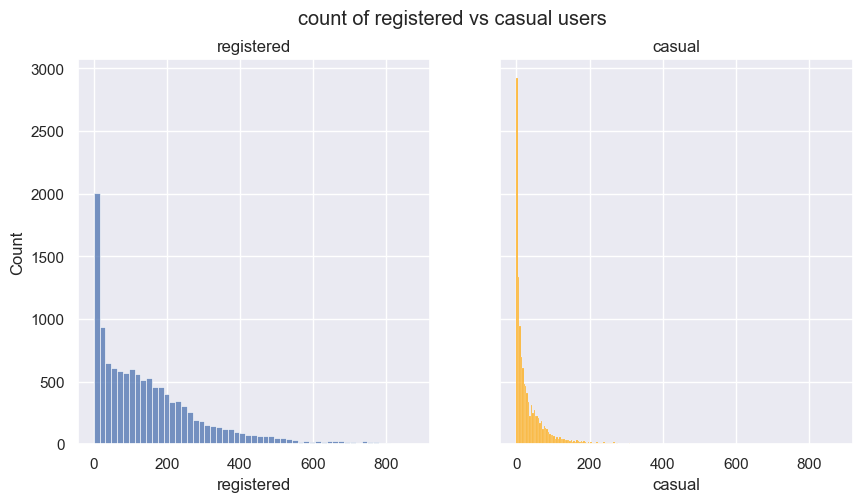

In [5]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))
fig.suptitle('count of registered vs casual users')
axes[0].set_title('registered')
axes[1].set_title('casual')


#registered
sns.histplot(ax=axes[0], x=df['registered'])
sns.histplot(ax=axes[1], x=df['casual'], color='orange')

In [6]:
print("nilai maksimum registered : ", df['registered'].max())
print("nilai minimum registered : ", df['registered'].min())

nilai maksimum registered :  876
nilai minimum registered :  0


In [7]:
print("nilai maksimum casual : ", df['casual'].max())
print("nilai minimum casual : ", df['casual'].min())

nilai maksimum casual :  362
nilai minimum casual :  0


Jika kita lihat distribusi dari jumlah pengguna `registered` dan `casual` memiliki range yang besar. Untuk pengguna terdaftar (registered) antara 0-876 orang dan untuk pengguna kasual (casual) antara 0-362 orang. Dari grafik juga terlihat sebaran nya sangat condong ke kanan (*extremely positive skew*). Salah satu cara untuk mengurangi skewness pada kedua target adalah dengan transformasi logaritma. 

catatan : pada distribusi users count terlihat bahwa seperti terdapat banyak *outliers*, tapi sebenarnya ini merupakan outlier alami (*natural outliers*) atau sebaran alamiah dari bukan karena kesalahan input atau hal lainnya. Nah, salah satu cara untuk mengatasi hal ini adalah dengan mencari log dari nilai count sehingga skewness dari kolom `registered` dan `casual` berkurang. Maka untuk selanjutnya saya akan gunaka Root Mean Squared Log Error (RMSLE) sebagai salah satu metrik penilaian, karena RMSLE tidak sensitif terhadap perbedaan nilai pada angka kecil dan besar (karena diambil nilai log)

logaritma

In [8]:
df['registered_log'] = df['registered'] + 1 
df['registered_log'] = np.log(df['registered_log'])

df['casual_log'] = df['casual'] + 1 
df['casual_log'] = np.log(df['casual_log'])

catatan : pada kode di atas nilai count ditambah 1 untuk menghindari nilai 0 pada kolom `registered` dan `casual` karena log(0) tak terdefinisi.

<AxesSubplot: title={'center': 'casual'}, xlabel='casual_log', ylabel='Count'>

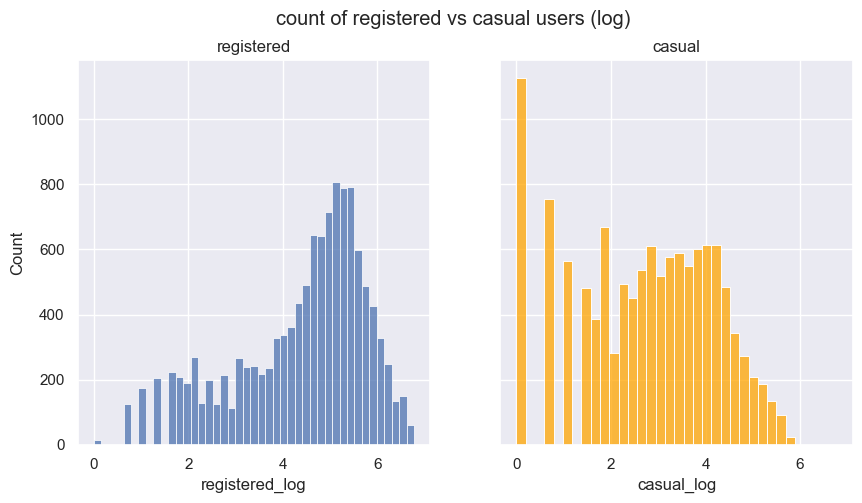

In [9]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))
fig.suptitle('count of registered vs casual users (log)')
axes[0].set_title('registered')
axes[1].set_title('casual')

#registered
sns.histplot(ax=axes[0], x=df['registered_log'])
sns.histplot(ax=axes[1], x=df['casual_log'], color='orange')

ii) **Hour (`hr`) related to users count**

*Hourly Trend*

<AxesSubplot: xlabel='hr', ylabel='cnt'>

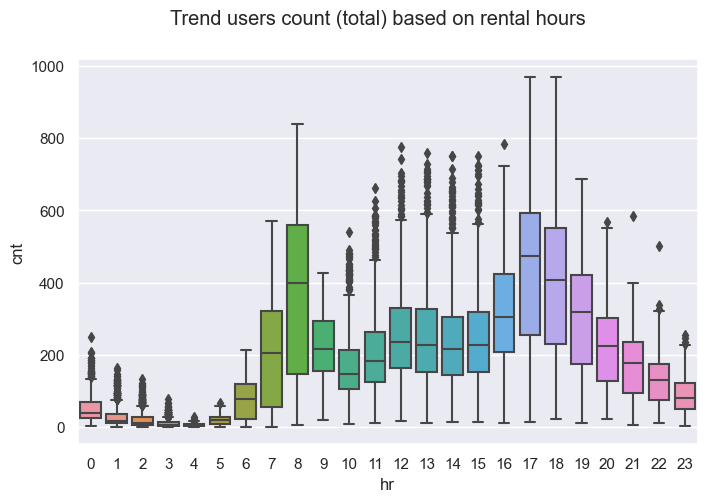

In [10]:
fig = plt.figure(figsize=(8,5))
fig.suptitle("Trend users count (total) based on rental hours")
sns.boxplot(x=df['hr'], y=df['cnt'])

Seperti yang terlihat pada grafik di atas, bisa kita kategorikan menjadi tiga kelompok yaitu :

* **High** : jam 7-9 dan 17-19 
* **Average**   : jam 10-16
* **Low**       : jam 0-6 dan 20-24 

Selanjutnya mari kita lihat distribusi dari registered dan casual users pada setiap jam (*hourly trend*)

<AxesSubplot: xlabel='hr', ylabel='casual'>

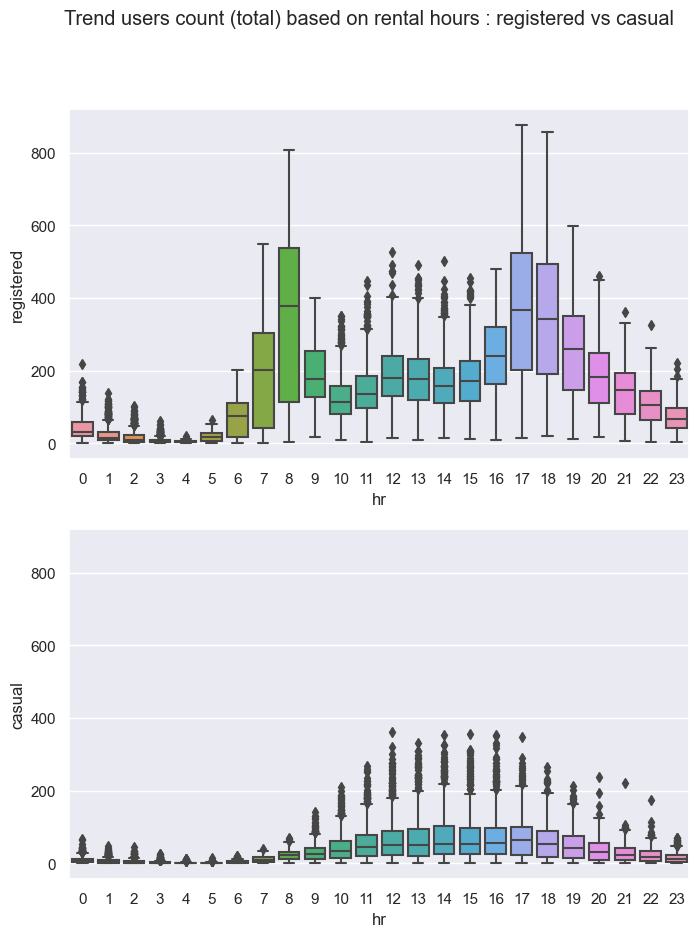

In [11]:
fig, axes = plt.subplots(2, 1, sharey=True, figsize=(8,10))
fig.suptitle("Trend users count (total) based on rental hours : registered vs casual")
sns.boxplot(ax=axes[0] ,x=df['hr'], y=df['registered'])
sns.boxplot(ax=axes[1] ,x=df['hr'], y=df['casual'])

Ternyata jumlah pengguna yang terdaftar (registered users) memiliki trend yang mirip dengan trend pengguna total (total users). Sedangkan untuk pengguna kasual memiliki trend yang berbeda, dimana kebanyakan lama pengguna kasual menyewa sepeda ada jam 10-18 waktu setempat.

**iii) date (`dteday`)**

In [12]:
# konversi kolom dteday ke format datetime
df['dteday'] = pd.to_datetime(df['dteday'])

a) Daily Trend

Pertama kita akan ekstrak hari pada kolom tanggal atau `dteday`, lalu plot dengan boxplot untuk melihat sebaran pengguna `registered` dan `casual` sehingga kita dapat mengetahui trend jumlah pengguna bedasarkan hari.

In [13]:
df['day'] = df['dteday'].dt.strftime("%A")

<AxesSubplot: xlabel='day', ylabel='casual'>

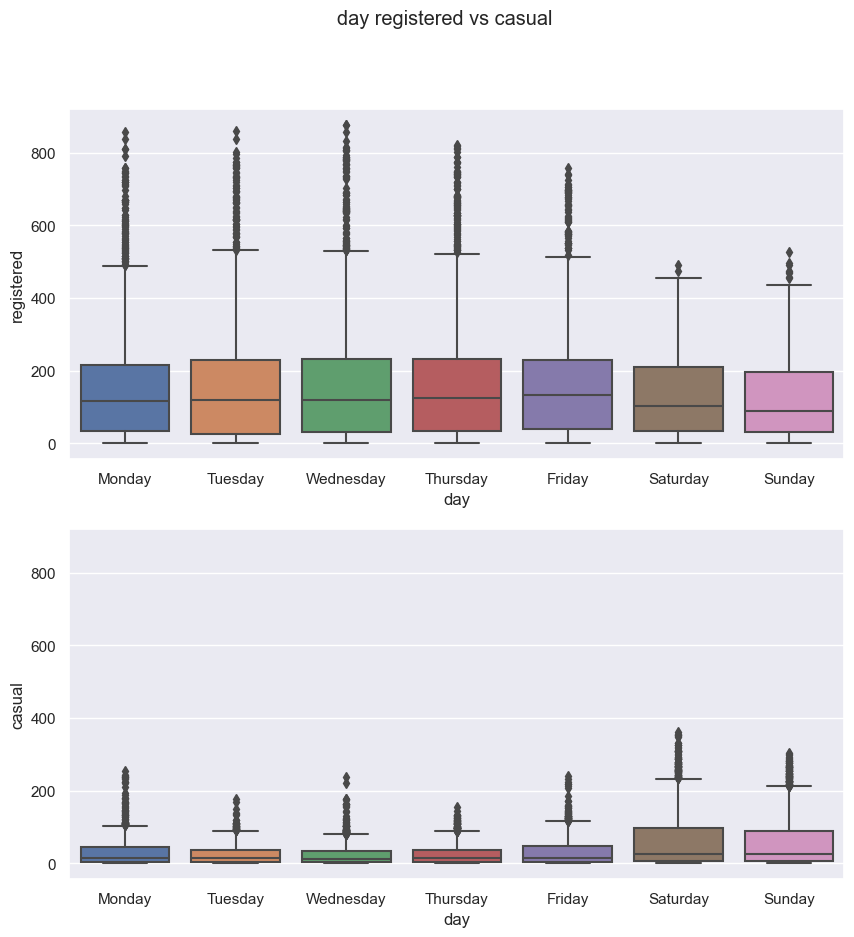

In [14]:
fig, axes = plt.subplots(2, 1, sharey=True, figsize=(10,10))
fig.suptitle('day registered vs casual')
sns.boxplot(ax=axes[0] ,x=df['day'], y=df['registered'], order=("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))
sns.boxplot(ax=axes[1] ,x=df['day'], y=df['casual'],  order=("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

Seperti yang saya duga, pengguna yang terdaftar (`registered`) memiliki kecenderungan untuk menyewa sepeda pada hari kerja (*weekdays*) karena biasanya mereka menggunakan sepeda sebagai sarana transportasi untuk berangkat ke kantor. Sedangkan pengguna kasual (`casual`) cenderung menyewa sepeda di *weekend*, karena pengguna ini biasanya menggunakan sepeda untuk jalan-jalan akhir minggu untuk mengisi hari libur kerja.

Selanjutnya mari kita lihat distribusi rata-rata pengguna sepeda berdasarkan hari pada setiap jam.

Text(0.5, 1.0, 'Average Registered Bike Users Count By Hour Of The Day')

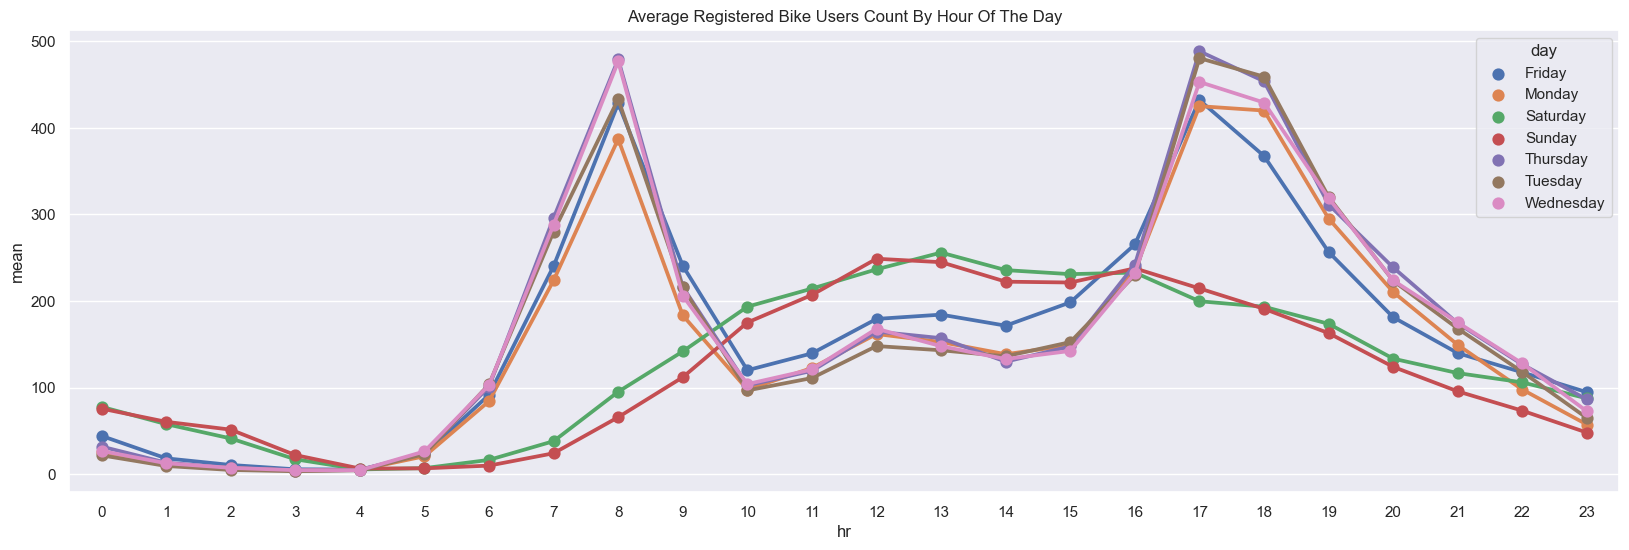

In [15]:
data_reg = df.groupby(['day', 'hr'])['registered'].mean().reset_index(name='mean')

plt.figure(figsize=(20,6))
sns.pointplot(data=data_reg, x='hr', y='mean', hue='day')
plt.title("Average Registered Bike Users Count By Hour Of The Day")

Jika kita lihat, pengguna yang terdaftar (registered user) paling banyak menyewa sepeda di pagi hari (jam 8 pagi) dan sekitar petang hari (jam 17-18) ketika di hari kerja (weekdays). Sedangkan saat di akhir minggu (weekend), pengguna terdaftar kebanyakan menyewa sepeda di siang hari sekitar jam 11.00-13.00.

Selanjutnya mari kita lihat sebaran pengguna kasual setiap jam nya.

Text(0.5, 1.0, 'Average Casual Bike Users Count By Hour Of The Day')

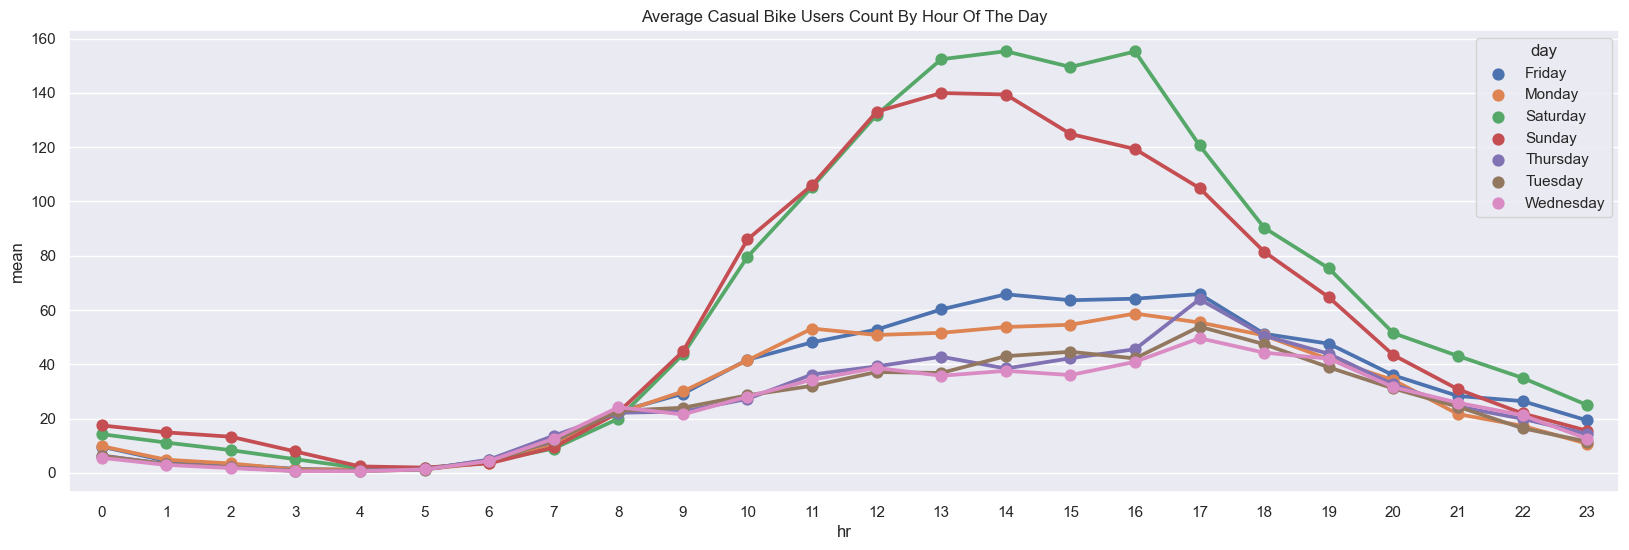

In [16]:
data_cas = df.groupby(['day', 'hr'])['casual'].mean().reset_index(name='mean')

plt.figure(figsize=(20,6))
sns.pointplot(data=data_cas, x='hr', y='mean', hue='day')
plt.title("Average Casual Bike Users Count By Hour Of The Day")

Berbeda dengan pengguna terdaftar, pengguna kasual lebih banyak menyewa sepeda di akhir minggu (Sabtu dan Minggu) di siang hingga sore hari (jam 12.00-16.00). Dan jika kita lihat sesuai dengan asumsi, pengguna kasual akan terlihat berbeda jauh (lebih sedikit) ketika di hari kerja (weekdays).

b) Quarter Year (kuartal tahun) trend

In [17]:
# ekstrak bulan pada kolom `dteday`
df['month'] = df['dteday'].dt.strftime("%m")
df['month'] = df['month'].astype(str)
df['month']

0        12
1        06
2        06
3        03
4        07
         ..
12160    01
12161    07
12162    02
12163    03
12164    04
Name: month, Length: 12165, dtype: object

<AxesSubplot: xlabel='year', ylabel='count'>

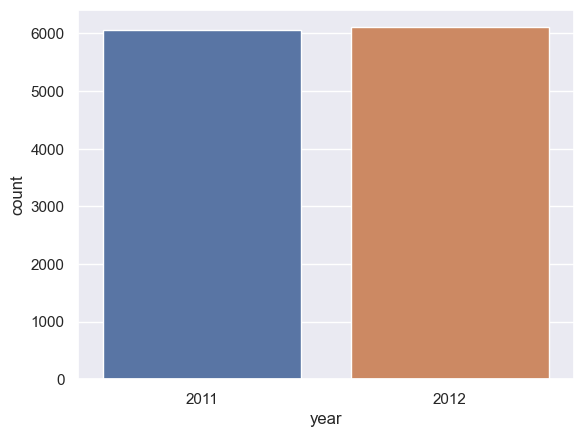

In [18]:
# ekstrak tahun pada kolom `dteday`
df['year'] = df['dteday'].dt.strftime("%Y")
df['year']
sns.countplot(x=df['year'])

Terlihat bahwa distribusi jumlah user memiliki sebaran yang hampir sama banyak pada tahun 2011 dan 2012

Mari kita lihat trend jumlah pengguna dari waktu ke waktu (2011-2012)

<AxesSubplot: xlabel='dteday', ylabel='cnt'>

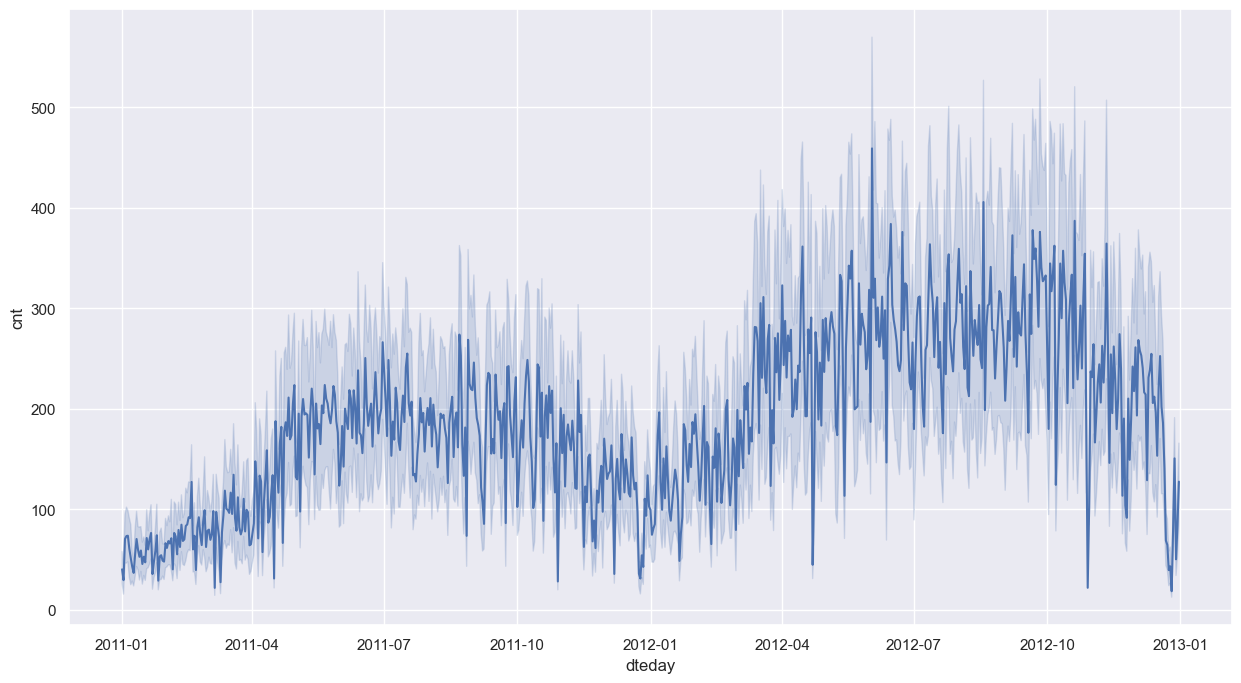

In [19]:
plt.figure(figsize=(15,8))
sns.lineplot(df, x='dteday', y='cnt')

Dari grafik di atas, jumlah user/pengguna cenderung meningkat seiiring berjalan nya waktu dari awal tahun 2011 sampai akhir tahun 2012.

Selanjutnya kita ekstrak nilai kuartal tahun (quarter) atau setiap 3 bulan dimana :

* Q1 : Januari, Februari, Maret
* Q2 : April, Mei, Juni
* Q3 : Juli, Agustus, September
* Q4 : Oktober, November, Desember

In [20]:
def quarter (year) :
    for month in df['month'].unique() :
        if month in ['01','02','03'] :
            df.loc[(df['year']==year) & (df['month']==month), 'quarter'] = f"{year}_Q1"
        elif month in ['04','05','06'] :
            df.loc[(df['year']==year) & (df['month']==month), 'quarter'] = f"{year}_Q2"
        elif month in ['07','08','09'] :
            df.loc[(df['year']==year) & (df['month']==month), 'quarter'] = f"{year}_Q3"
        elif month in ['10','11','12'] :
            df.loc[(df['year']==year) & (df['month']==month), 'quarter'] = f"{year}_Q4"

In [21]:
quarter("2011")
quarter("2012")

Selanjutnya kita plot dengan lineplot untuk melihat trend jumlah pengguna (count of users) pada pengguna `registered` dan `casual`

<AxesSubplot: xlabel='quarter', ylabel='casual'>

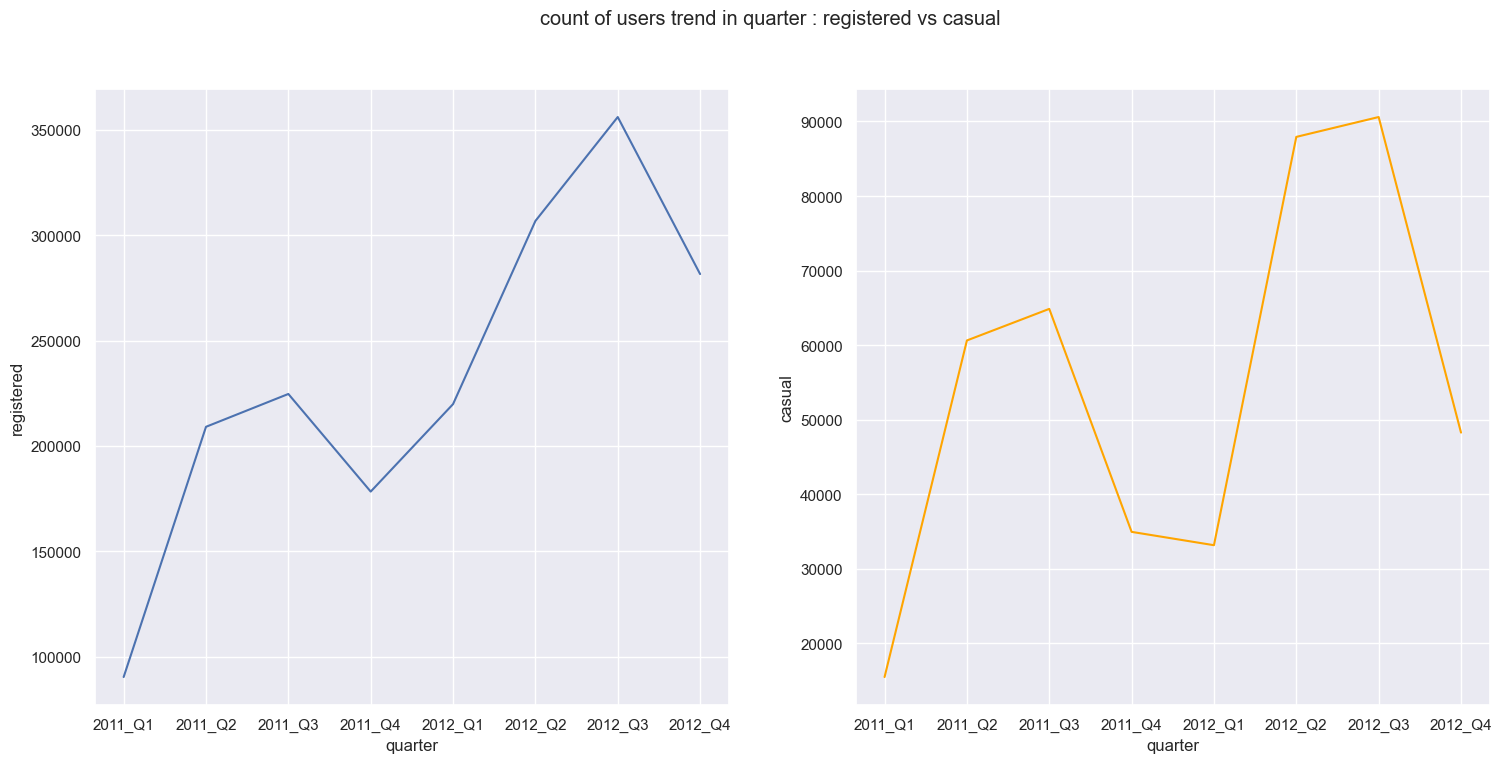

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(18,8))
fig.suptitle('count of users trend in quarter : registered vs casual')
sns.lineplot(ax=axes[0] , data=df.groupby(['quarter'])['registered'].sum())
sns.lineplot(ax=axes[1] , data=df.groupby(['quarter'])['casual'].sum(), color='orange')

Jumlah user terbanyak baik untuk `registered` atau `casual` ada pada kuarter ke-3 (Q3) tahun 2012. Yang terkecil ada di kuarter pertama tahun 2011 (Q1_2011). Dari grafik di atas juga bisa lihat bahwa kolom quarter cenderung mempengaruhi nilai jumlah pengguna.

In [23]:
df['quarter']

0        2011_Q4
1        2012_Q2
2        2011_Q2
3        2012_Q1
4        2012_Q3
          ...   
12160    2012_Q1
12161    2012_Q3
12162    2012_Q1
12163    2012_Q1
12164    2011_Q2
Name: quarter, Length: 12165, dtype: object

In [24]:
df_copy = df.copy()

**iv) `season` related to users count**

season (1: winter, 2: spring, 3: summer, 4: fall)

In [25]:
['winter', 'spring', 'summer', 'fall']

['winter', 'spring', 'summer', 'fall']

[Text(0, 0, 'winter'),
 Text(1, 0, 'spring'),
 Text(2, 0, 'summer'),
 Text(3, 0, 'fall')]

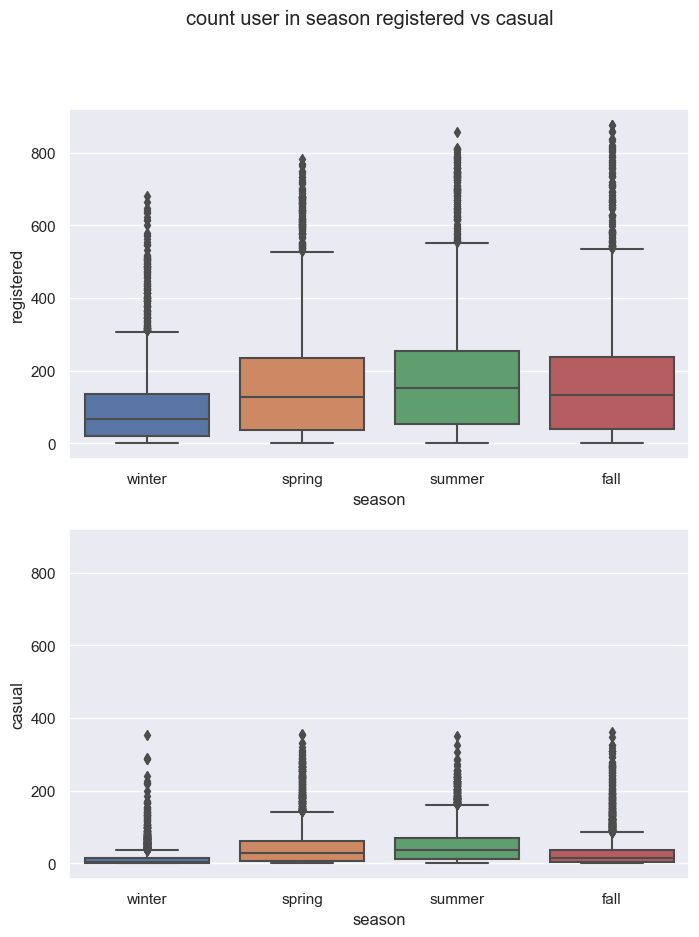

In [26]:
fig, axes = plt.subplots(2, 1, sharey=True, figsize=(8,10))
fig.suptitle('count user in season registered vs casual')
sns.boxplot(ax=axes[0] ,x=df['season'], y=df['registered'])
axes[0].set_xticklabels(['winter', 'spring', 'summer', 'fall'])
sns.boxplot(ax=axes[1] ,x=df['season'], y=df['casual'])
axes[1].set_xticklabels(['winter', 'spring', 'summer', 'fall'])

Sebaran pengguna pada keempat season terlihat merata terutama pada pengguna kasual. Untuk jumlah pengguna terdaftar terlihat paling sedikit saat musim dingin/winter karena tentu saja saat musim dingin akan turun salju sehingga akan sedikit peminat untuk menyewa sepeda.

**v) `weathersit` related to users count**

-	1: Clear, Few clouds, Partly cloudy, Partly cloudy
-	2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
-	3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
-	4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


In [27]:
df['weathersit'].value_counts()

1    8071
2    3119
3     972
4       3
Name: weathersit, dtype: int64

Jika kita lihat, kategori weathersit ke-4 hanya ada 3 baris, sangat-sangat sedikit jika dibandingkan kategori lain. Nanti pada tahap preprocessing, kita akan gabung saja ke kategori ke-3.

<AxesSubplot: xlabel='weathersit', ylabel='casual'>

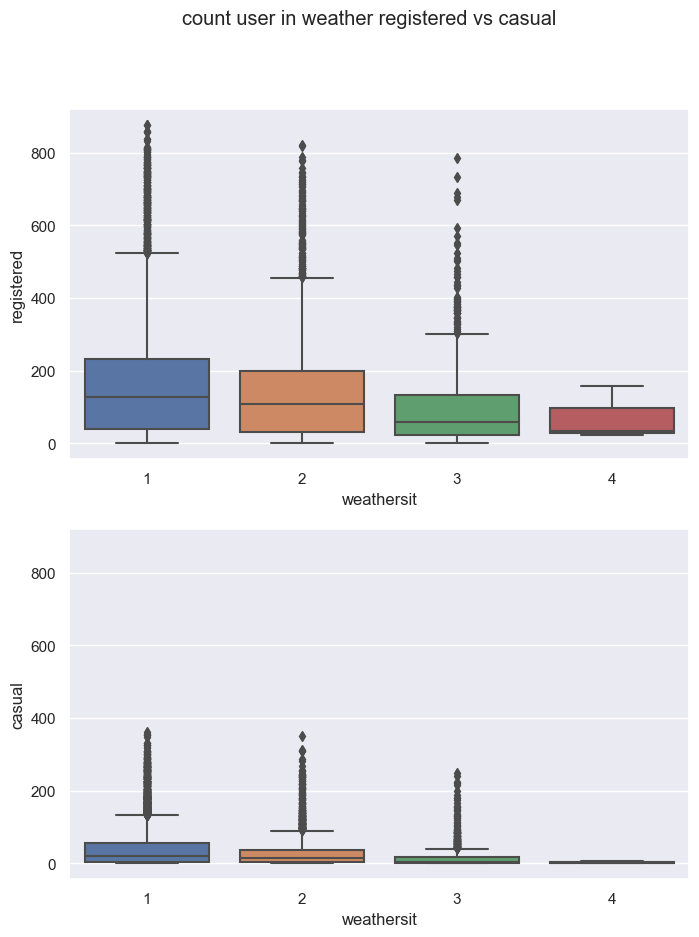

In [28]:
fig, axes = plt.subplots(2, 1, sharey=True, figsize=(8,10))
fig.suptitle('count user in weather registered vs casual')
sns.boxplot(ax=axes[0] ,x=df['weathersit'], y=df['registered'])
sns.boxplot(ax=axes[1] ,x=df['weathersit'], y=df['casual'])

Pada keterangan pada dataset, kondisi hujan (rain) terjadi pada kategori `3` (untuk hujan ringan) dan kategori `4` (untuk hujan deras). Sesuai dengan dugaan, jumlah pengguna pada musim hujan akan menurun seperti yang terlihat pada grafik di atas. Pada pengguna terdaftar (registered) terlihat masih ada cukup banyak orang yang menggunakan sepeda pada kondisi hujan berat, kemungkinan karena sedang berangkat kerja atau tidak ada kendaraan alternatif. Sedangkan untuk pengguna kasual sanget terlihat jelas, sangat sedikit pengguna (bahkan hampir tidak ada) saat hujan berat karena biasanya pengguna kasual menggunakan sepeda untuk mengisi liburan.

**vi) Ambient Temperature (`temp`) & Apparent Temperature (`atemp`) related to users count**

<AxesSubplot: title={'center': 'count of users over apparent temperature'}, xlabel='atemp', ylabel='Count'>

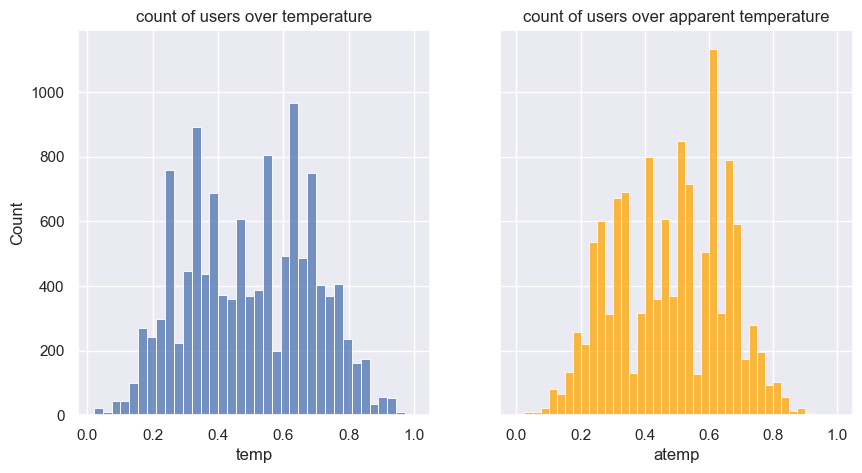

In [29]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10,5))
axes[0].set_title('count of users over temperature')
sns.histplot(ax = axes[0], x=df['temp'])
axes[1].set_title('count of users over apparent temperature')
sns.histplot(ax = axes[1], x=df['atemp'], color='orange')

Dari grafik di atas dapat dilihat bahwa sebaran data kolom `temp` dan `atemp` mirip, tentu saja ini masuk akal karena *temperature* memiliki hubungan erat dengan *apparent temperature*. Dimana apparent temperature atau suhu yang dirasakan ini sama dengan definisi *heat index* yang bisa dibaca pada halaman berikut [heat index](https://en.wikipedia.org/wiki/Heat_index). Untuk humidity sebaran nya agak condong ke kiri (*negative skew*)

In [30]:
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,registered_log,casual_log,day,month,year,quarter
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250,5.424950,3.218876,Friday,12,2011,2011_Q4
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18,2.833213,1.098612,Sunday,06,2012,2012_Q2
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107,4.510860,2.890372,Wednesday,06,2011,2011_Q2
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145,4.844187,2.995732,Saturday,03,2012,2012_Q1
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857,6.632002,4.605170,Tuesday,07,2012,2012_Q3


Selanjutnya mari kita lihat temperatur favorit penyewa sepeda, dengan melihat jumlah total users per temperatur yang tercatat

Text(0.8, 88000, 'favorite temperature')

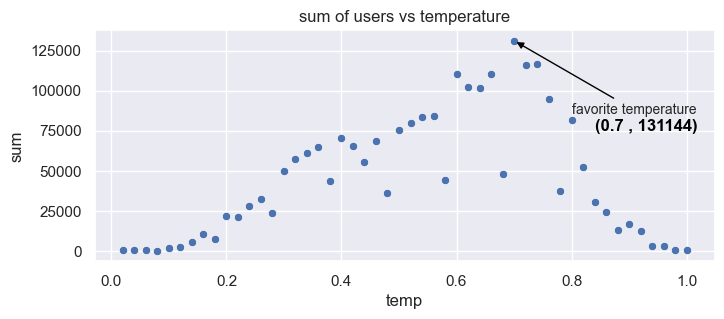

In [31]:
## kolom temp (temperatur lingkungan)
plt.figure(figsize=(8,3))
temp_df = df.groupby(['temp'])['cnt'].sum().reset_index(name='sum')
sns.scatterplot(x=temp_df['temp'], y=temp_df['sum']).set_title('sum of users vs temperature')
plt.text(0.84, 75000, "(0.7 , 131144)", horizontalalignment='left', size='medium', color='black', weight='semibold' )
plt.annotate("favorite temperature",
            xy=(0.7, 131144), 
            xytext=(0.8 , 88000),
            size='small',
            va='center',
            ha='left',
            arrowprops={'arrowstyle': '-|>', 'color' : 'black'})

Text(0.8, 180000, 'favorite apparent temperature')

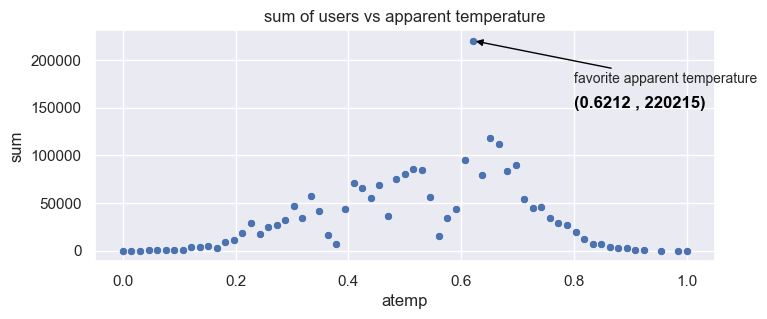

In [32]:
## kolom temp yaitu temperatur lingkungan yang dirasakan (apparent temperature)
plt.figure(figsize=(8,3))
atemp_df = df.groupby(['atemp'])['cnt'].sum().reset_index(name='sum')
sns.scatterplot(x=atemp_df['atemp'], y=atemp_df['sum']).set_title('sum of users vs apparent temperature')
plt.text(0.8, 150000, "(0.6212 , 220215)", horizontalalignment='left', size='medium', color='black', weight='semibold' )
plt.annotate("favorite apparent temperature",
            xy=(0.6212, 220215), 
            xytext=(0.8, 180000),
            size='small',
            va='center',
            ha='left',
            arrowprops={'arrowstyle': '-|>', 'color' : 'black'})

Dari kedua grafik di atas dapat kita lihat bahwa orang-orang lebih suka menyewa dan mengendarai sepeda pada temperatur sekitar 25&deg;C, karena memang pada temperatur ini suhu nya bisa dibilang nyaman karena tidak terlalu panas atau dingin.

catatan : nilai 25&deg;C saya dapatkan dari definisi `temp` dan `atemp` yang diketahui pada dataset dimana jika kita konversi :
* `temp` --> 0.7 artinya sama dengan 24.9&deg;C
* `atemp` --> 0.6212 artinya sama dengan 24.99&deg;C

In [33]:
atemp_df[atemp_df['sum'] == atemp_df['sum'].max()]

,atemp,sum
41,0.6212,220215


In [34]:
temp_df[temp_df['sum'] == temp_df['sum'].max()]

,temp,sum
34,0.7,131144


Tapi coba kita lihat dari rata-rata (average) pengguna berdasarkan temperatur/suhu lingkungan

Text(0.5, 1.0, 'Average user count vs ambient temperature (temp feature)')

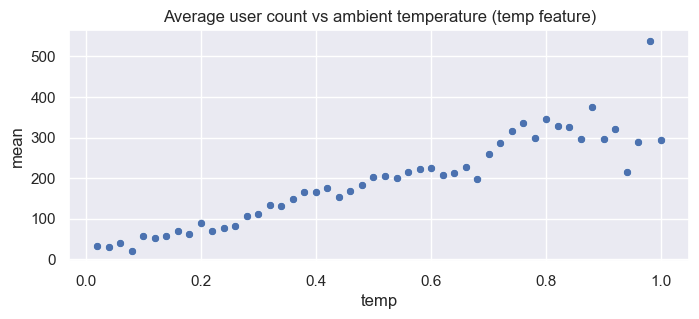

In [35]:
## kolom temp (temperatur lingkungan)
plt.figure(figsize=(8,3))
temp_df = df.groupby(['temp'])['cnt'].mean().reset_index(name='mean')
sns.scatterplot(x=temp_df['temp'], y=temp_df['mean']).set_title('Average user count vs ambient temperature (temp feature)')

Text(0.5, 1.0, 'Average user count vs apparent temperature (atemp feature)')

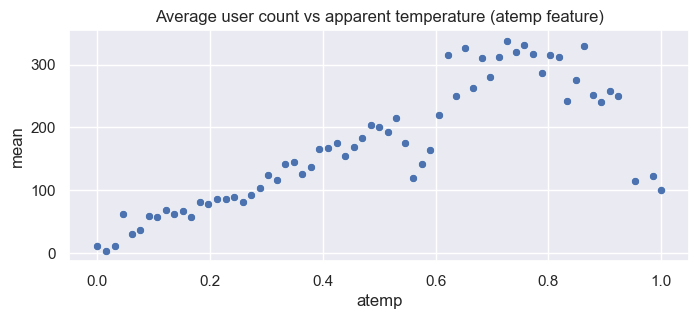

In [36]:
## kolom temp (temperatur yang dirasakan)
plt.figure(figsize=(8,3))
atemp_df = df.groupby(['atemp'])['cnt'].mean().reset_index(name='mean')
sns.scatterplot(x=atemp_df['atemp'], y=atemp_df['mean']).set_title('Average user count vs apparent temperature (atemp feature)')

Dari informasi yang saya dapatkan, data tentang penyewaan sepeda ini didapatkan dari Capital Bikeshare [https://en.wikipedia.org/wiki/Capital_Bikeshare] yang dimana basis nya ada di kota Washington DC di USA. Yang kita tahu penduduk di daerah USA kebanyakan cenderung suka berkegiatan (bersepeda contohnya) di saat temperatur cukup hangat. Ini sesuai dengan gambar di atas, yang terlihat bahwa permintaa penyewaan sepeda meningkat seiring meningkatnya temperatur. Tentu saja ini akan menjadi limitasi model yang nantinya akan kita buat, dimana model yang akan kita bentuk nanti tidak cocok digunakan di beberapa negara di benua Asia, Indonesia contohnya yang dimana penduduk cenderung lebih suka di rumah ketika cuaca hangat/panas.

**vi) Humidity (`hum`)**

Text(0.5, 1.0, 'count of users over humidity')

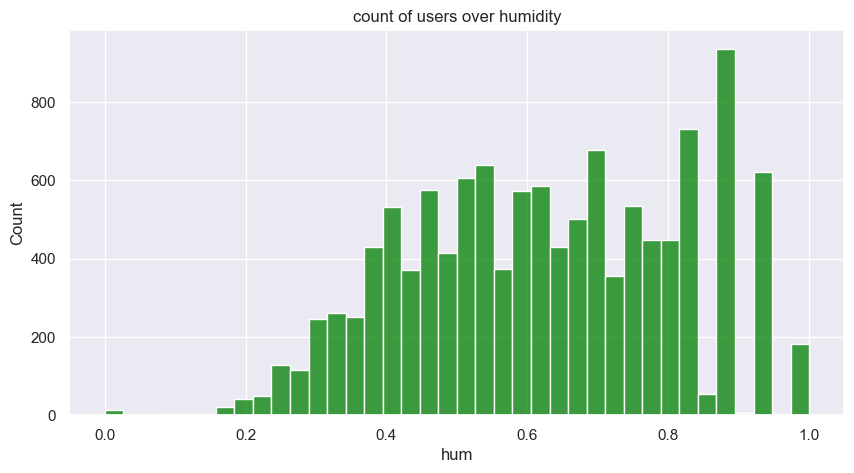

In [37]:
plt.figure(figsize=(10,5))
sns.histplot(x=df['hum'], color='green')
plt.title('count of users over humidity')

Sebaran jumlah pengguna terlihat skewness nya tidak terlalu miring. Tapi dari informasi yang saya dapat humidity (kelembapan) itu sulit untuk dijadikan tolak ukur tunggal untuk melihat hubungan antara jumlah pengguna. Kelembapan dan temperature memiliki hubungan yang erat untuk menentukan kondisi lingkungan yang "nyaman" bagi pengguna. Mari kita lihat sebaran rata-rata pengguna berdasarkan humidity dan temperatur lingkungan.

Registered users

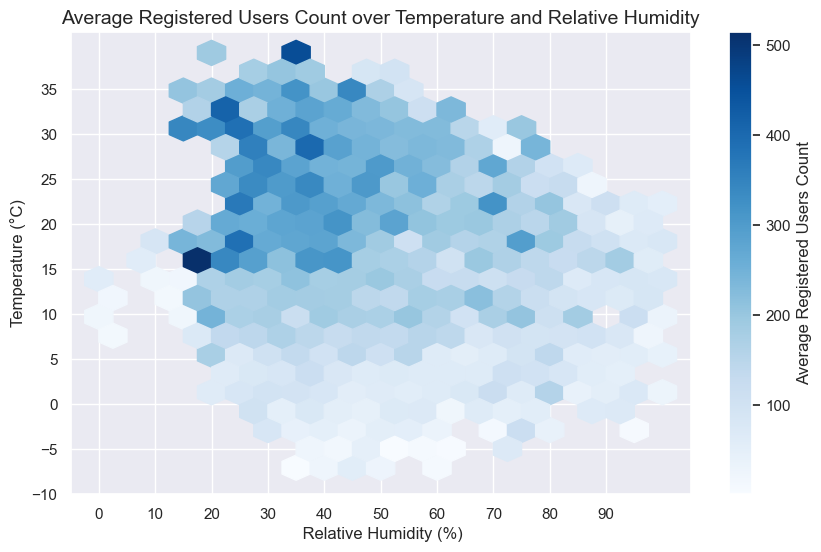

In [38]:
data_mean_temp_reg = df.groupby(['temp', 'hum'])['registered'].mean().reset_index(name='mean')
data_mean_temp_reg['temp_celcius'] = data_mean_temp_reg['temp']*(39+8) - 8
data_mean_temp_reg['hum'] = data_mean_temp_reg['hum']*100
data_mean_temp_reg

x = data_mean_temp_reg['hum']
y = data_mean_temp_reg['temp_celcius']
z = data_mean_temp_reg['mean']

fig, ax = plt.subplots(figsize=(10, 6))

hexbin = ax.hexbin( x= x, y= y, C= z, gridsize = 20,
                         cmap = 'Blues' 
                  )
                       
ax.set_xlabel(' Relative Humidity (%)')
ax.set_ylabel("Temperature (\N{DEGREE SIGN}C)")
cb = fig.colorbar(hexbin, ax=ax, label='Average Registered Users Count')
ax.set_xticks(range(0,100,10))
ax.set_yticks(range(-10,40,5))

ax.set_title('Average Registered Users Count over Temperature and Relative Humidity', size = 14)

plt.show()

Dari gambar di atas, dapat kita lihat pada pengguna terdaftar (registered) kebanyakan menyewa sepeda pada tingkat humiditas relatif 20%-45% dengan temperature di sekitar 15&deg;C-28&deg;C

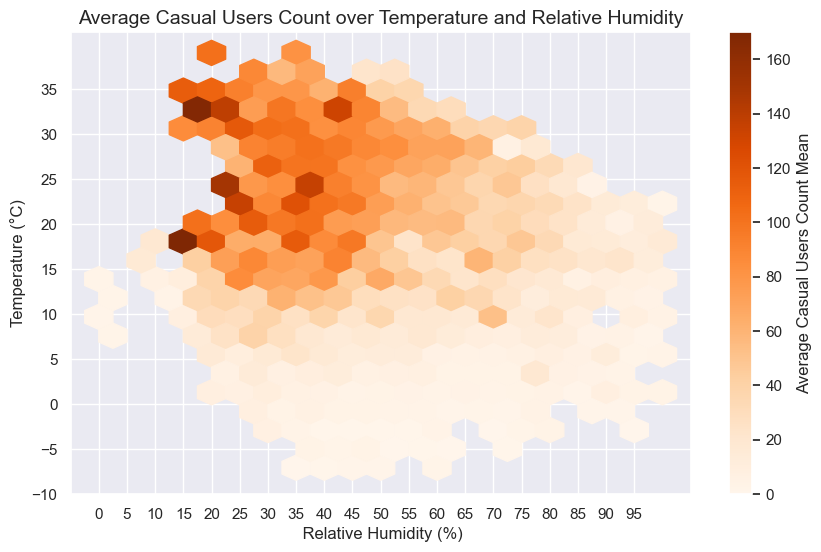

In [39]:
data_mean_temp_cas = df.groupby(['temp', 'hum'])['casual'].mean().reset_index(name='mean')
data_mean_temp_cas['temp_celcius'] = data_mean_temp_cas['temp']*(39+8) - 8
data_mean_temp_cas['hum'] = data_mean_temp_cas['hum']*100
data_mean_temp_cas

x = data_mean_temp_cas['hum']
y = data_mean_temp_cas['temp_celcius']
z = data_mean_temp_cas['mean']

fig, ax = plt.subplots(figsize=(10, 6))

hexbin = ax.hexbin( x= x, y= y, C= z, gridsize = 20,
                         cmap = 'Oranges' 
                  )
                       
ax.set_xlabel(' Relative Humidity (%)')
ax.set_ylabel("Temperature (\N{DEGREE SIGN}C)")
cb = fig.colorbar(hexbin, ax=ax, label='Average Casual Users Count Mean')
ax.set_xticks(range(0,100,5))
ax.set_yticks(range(-10,40,5))

ax.set_title('Average Casual Users Count over Temperature and Relative Humidity', size = 14)

plt.show()

Dari gambar di atas, dapat kita lihat pada pengguna terdaftar (registered) kebanyakan menyewa sepeda pada tingkat humiditas relatif 20%-45% dengan temperature di sekitar 17&deg;C-35&deg;C

**viii) `Holiday`**

,holiday,total users
0,0,2245297
1,1,57185


None

2302482


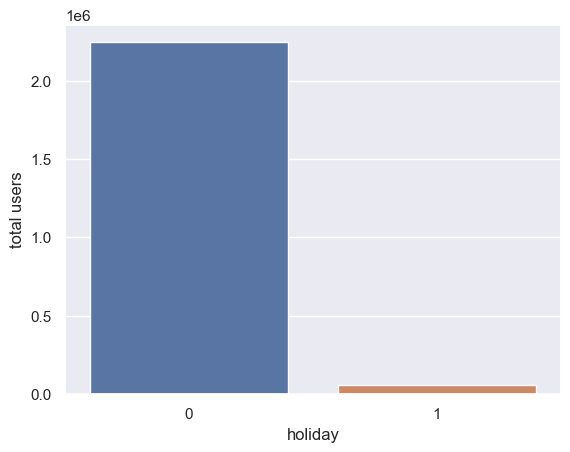

In [40]:
display(display(df.groupby(['holiday'])['cnt'].sum().reset_index(name='total users')))
sns.barplot(df.groupby(['holiday'])['cnt'].sum().reset_index(name='total users'), x='holiday', y='total users')
print(df['cnt'].sum())

Dari gambar di atas terlihat bahwa jumlah user total untuk hari libur (holiday) sangat tidak seimbang (*imbalanced case*) dimana hanya ada 57185 dari total  23024282 atau sekitar 0.2%.

In [41]:
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,registered_log,casual_log,day,month,year,quarter
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250,5.424950,3.218876,Friday,12,2011,2011_Q4
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18,2.833213,1.098612,Sunday,06,2012,2012_Q2
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107,4.510860,2.890372,Wednesday,06,2011,2011_Q2
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145,4.844187,2.995732,Saturday,03,2012,2012_Q1
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857,6.632002,4.605170,Tuesday,07,2012,2012_Q3


### DATA PRE-PROCESSING

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk pemodelan. Beberapa hal yang dilakukan adalah:

1) Data Cleaning
- Drop data duplikat jika ada.
- Cek format penulisan data apakah sudah benar atau belum (jika ada).
- Drop fitur yang tidak memiliki relevansi terhadap jumlah user sepeda.
- Melakukan treatment terhadap missing value jika ada. Bisa dengan cara men-drop fiturnya jika memang tidak dibutuhkan atau bisa juga dengan mengimputasi dengan nilai yang paling masuk baik secara *domain knowledge* maupun secara statistik.
- Pengecekan Outliers

2) Feature engineering, yaitu dengan membuat fitur baru yang masih relevan untuk pemodelan nanti. Bisa kombinasi  antar fitur maupun membuat fitur baru dari awal.

3) Data Transformation
- langkah ini melibatkan pengubahan data ke dalam format yang lebih cocok untuk pemodelan regressi untuk memprediksi jumlah pengguna sepeda. Ini dapat mencakup normalisasi data numerik, membuat variabel dummy, dan mengkodekan data kategorikal.

####  1. Data Cleaning

Untuk proses data preprocessing dan feature engineering, kita akan menggunakan dataframe hasil duplikasi dari dataframe yang sebelumnya digunakan.

In [42]:
# Membuat duplikasi dataframe
df_model = df.copy()

Mari kita cek dulu informasi sampel data setiap kolom 

In [43]:
# Cek info lebih detail untuk setiap fitur
pd.set_option('display.max_colwidth', 1)
listItem = []

for col in df.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)])

df_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,dteday,datetime64[ns],0,0.0,731,"[2011-07-06T00:00:00.000000000, 2011-12-13T00:00:00.000000000]"
1,hum,float64,0,0.0,89,"[0.0, 0.26]"
2,weathersit,int64,0,0.0,4,"[4, 2]"
3,holiday,int64,0,0.0,2,"[1, 0]"
4,season,int64,0,0.0,4,"[2, 4]"
5,atemp,float64,0,0.0,65,"[0.1212, 0.0909]"
6,temp,float64,0,0.0,50,"[0.08, 0.36]"
7,hr,int64,0,0.0,24,"[23, 11]"
8,casual,int64,0,0.0,305,"[76, 104]"
9,registered,int64,0,0.0,742,"[324, 661]"


##### 1.1 **Missing Value**

Bisa kita lihat bahwa tidak ada data yang kosong (*missing value*), sehingga kita tidak akan melakukan imputasi data.

##### 1.2 **Duplicated Data**

Cek apakah ada data duplikat 

In [44]:
df_model.duplicated().sum()

0

##### 1.3 **Outliers Detection**

Tidak ada data duplikat --> selanjutnya kita cek outliers

In [45]:
df_model.describe()

,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,registered_log,casual_log
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,1.416934,0.029758,2.488615,0.476996,0.498185,11.519770,35.834443,153.436580,189.271023,4.375225,2.706393
std,0.192102,0.635937,0.169925,1.106157,0.171857,0.192492,6.931872,49.489286,151.046123,181.223903,1.396478,1.495446
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.470000,1.000000,0.000000,2.000000,0.333300,0.340000,6.000000,4.000000,34.000000,40.000000,3.555348,1.609438
50%,0.620000,1.000000,0.000000,2.000000,0.484800,0.500000,12.000000,17.000000,115.000000,142.000000,4.753590,2.890372
75%,0.780000,2.000000,0.000000,3.000000,0.621200,0.660000,18.000000,49.000000,220.000000,282.000000,5.398163,3.912023
max,1.000000,4.000000,1.000000,4.000000,1.000000,1.000000,23.000000,362.000000,876.000000,970.000000,6.776507,5.894403


In [46]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')

1. fitur `hum`

In [47]:
find_anomalies(df_model['hum'])

IQR: 0.31000000000000005
limit_bawah: 0.004999999999999893
limit_atas: 1.245


Text(0.5, 1.0, 'Humidity feature distribution')

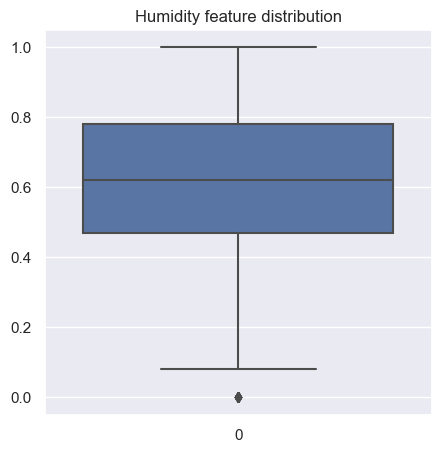

In [48]:
plt.figure(figsize=(5,5))
sns.boxplot(df_model['hum'])
plt.title("Humidity feature distribution")

Jika kita lihat, ada 14 baris yang memiliki nilai kelembapan (`hum`) sebesar 0 yang bisa kita anggap sebagai outlier. Mari kita cek nilai ini.

In [49]:
print(df_model[df_model['hum']<0.0036].shape)
display(df_model[df_model['hum']<0.0036])

(14, 17)


,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,registered_log,casual_log,day,month,year,quarter
345,2011-03-10,0.0,3,0,1,0.3939,0.38,7,1,36,37,3.610918,0.693147,Thursday,03,2011,2011_Q1
871,2011-03-10,0.0,3,0,1,0.4394,0.44,15,3,11,14,2.484907,1.386294,Thursday,03,2011,2011_Q1
1645,2011-03-10,0.0,3,0,1,0.3182,0.34,0,3,0,3,0.000000,1.386294,Thursday,03,2011,2011_Q1
3239,2011-03-10,0.0,2,0,1,0.4394,0.44,17,2,109,111,4.700480,1.098612,Thursday,03,2011,2011_Q1
3717,2011-03-10,0.0,2,0,1,0.3333,0.34,22,4,30,34,3.433987,1.609438,Thursday,03,2011,2011_Q1
4924,2011-03-10,0.0,3,0,1,0.3333,0.36,6,0,12,12,2.564949,0.000000,Thursday,03,2011,2011_Q1
7285,2011-03-10,0.0,3,0,1,0.3182,0.34,1,0,2,2,1.098612,0.000000,Thursday,03,2011,2011_Q1
7760,2011-03-10,0.0,3,0,1,0.4242,0.42,12,4,30,34,3.433987,1.609438,Thursday,03,2011,2011_Q1
8412,2011-03-10,0.0,3,0,1,0.3939,0.38,8,1,43,44,3.784190,0.693147,Thursday,03,2011,2011_Q1
8960,2011-03-10,0.0,3,0,1,0.3485,0.34,23,1,26,27,3.295837,0.693147,Thursday,03,2011,2011_Q1


Dari sumber wikipedia [link](https://en.wikipedia.org/wiki/List_of_weather_records), suhu tertinggi dengan **kelembapan relatif (relative humidity) 100%** : Suhu 34 °C (93 °F) dengan kelembapan relatif 100% di Jask, Iran, pada 21 Juli 2012. (*Perlu dicatat bahwa kolom `hum` disini memiliki rentang nilai 0 - 1 yang artinya bisa diartikan bahwa kolom ini berisikan nilai kelembapan relatif (*relative humidity*)*). Sedangkan untuk nilai terkecil dari kelembapan relatif yang pernah tercatat adalah di Safi-Abad Dezful, Iran mencapai 115,7°F (46,5°C) dengan titik embun -27,8°F (-33,2°C), menjadikan kota ini berpenduduk 420.000 Iran barat kelembaban relatif sangat rendah **0,36%**. [lowest relative humidity](https://www.wunderground.com/cat6/world-record-low-humidity-116f-036-humidity-iran)

Maka pada pemodelan kali ini, saya akan membatasi nilai kelembapan relatif (kolom `hum`) hanya pada rentang 0.0036 - 1.0 (0.36%-100%) sehingga jika kita lihat pada tabel dan grafik di atas ada 14 baris data yang kita drop (yaitu dengan nilai `hum` sebesar 0). Sebagai catatan juga, ini tentu saja akan menjadi limitasi model yang akan dibangun.

Text(0.5, 1.0, 'sebaran kolom hum setelah outlier di drop')

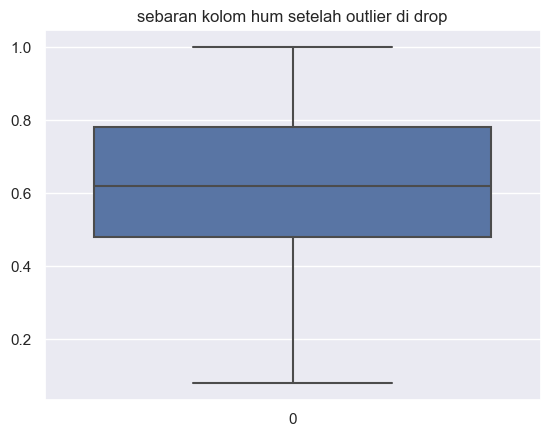

In [50]:
df_model = df_model.drop(df_model[df_model['hum']<0.036].index, axis=0)
sns.boxplot(df_model['hum']).set_title("sebaran kolom hum setelah outlier di drop")

2. kolom `registered`, `casual` dan `cnt`

Dari langkah sebelumnya kita sudah mencari nilai logaritma dari kolom `registered` dan `casual` yaitu `registered_log` dan `casual_log`

In [51]:
# registered_log
print("registered_log")
find_anomalies(df_model['registered_log'])

registered_log
IQR: 1.842814640028339
limit_bawah: 0.7911261014469049
limit_atas: 8.16238466156026


In [52]:
# casual_log
print("casual_log")
find_anomalies(df_model['casual_log'])

casual_log
IQR: 2.302585092994046
limit_bawah: -1.8444397270569686
limit_atas: 7.365900644919215


<AxesSubplot: title={'center': 'count of casual users'}, xlabel='casual_log'>

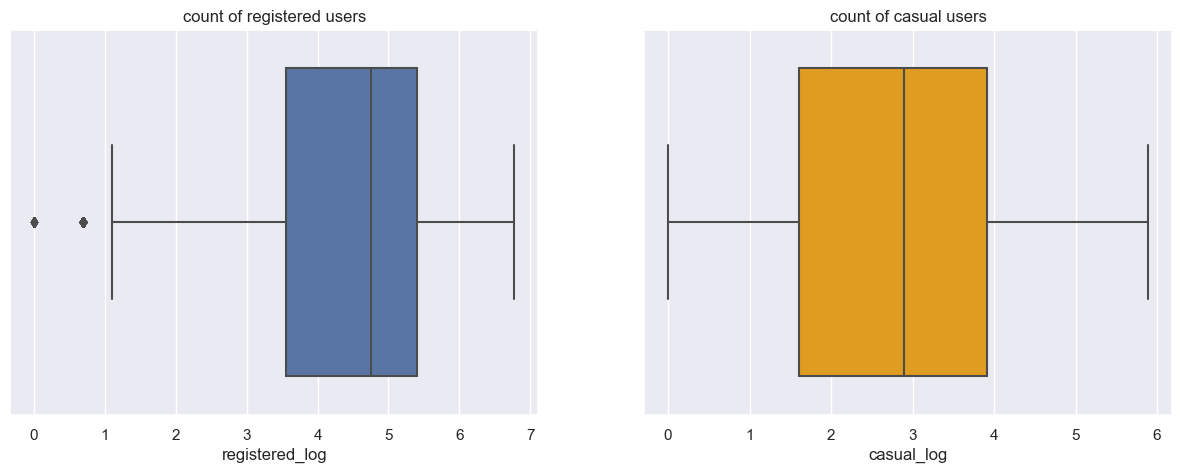

In [53]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15,5))
axes[0].set_title('count of registered users')
sns.boxplot(ax = axes[0], x=df_model['registered_log'])
axes[1].set_title('count of casual users')
sns.boxplot(ax = axes[1], x=df_model['casual_log'], color='orange')

In [54]:
df_model[df_model['registered_log']<0.7911261014469049]['registered'].value_counts().reset_index().rename({'index' : 'registered', 'registered' : 'count of row'},axis=1)

,registered,count of row
0,1,125
1,0,13


Dari metode IQR di atas didapat batas bawah fitur/kolom `registered` sebesar 0.34358170034802327. Yang dimana terlihat dari tabel value_counts di atas bahwa nilai outlier pada kolom `registered` itu adalah ketika count of registered users nya sebanyak 0 dan 1 dengan total 138 baris. Maka saya hanya akan memasukkan count of registered users lebih besar dari 1 ke dalam pemodelan, sehingga nilai outlier tersebut akan di drop. 

In [55]:
df_model = df_model[df_model['registered'] > 1]
### atau
### df_model = df_model[df_model['registered_log']>=0.7911261014469049]

Agar asumsi saya tetap masuk akal dan konsisten, selanjutnya saya juga akan mendrop baris yang dimana nilai count of casual users nya <= 1. Ini berarti di asumsikan baik registered maupun casual, nilai nya harus lebih besar dari 1, yang tentu saja ini akan menjadi limitasi dari model ini

In [56]:
df_model = df_model[df_model['casual'] > 1]

3. kolom `weathersit`

In [57]:
df_model['weathersit'].value_counts()

1    6941
2    2596
3    726 
4    1   
Name: weathersit, dtype: int64

Text(0.5, 1.0, 'weathersit distribution')

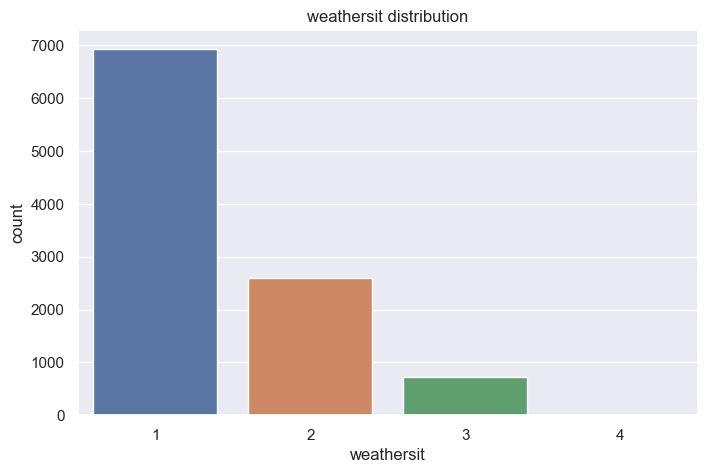

In [58]:
plt.figure(figsize=(8,5))
sns.countplot(x=df_model['weathersit'])
plt.title("weathersit distribution")

setelah ada baris yang di drop, maka sekarang hanya ada 1 baris saja yang kategori weathersit nya 4. Disini kita akan gabung ke kategori ke-3 karena kategori 4 dan 3 itu sama-sama cuaca yang sedang hujan

Maka untuk selanjutnya, pada pemodelan kali ini saya akan mengasumsikan bahwa hanya ada tiga kategori pada kolom `weathersit` yaitu kategori 1, 2 dan 3.

In [59]:
df_model.loc[df_model['weathersit']==4, 'weathersit'] = 3

#### 2. Feature Engineering

In [60]:
df_model.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,registered_log,casual_log,day,month,year,quarter
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250,5.424950,3.218876,Friday,12,2011,2011_Q4
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18,2.833213,1.098612,Sunday,06,2012,2012_Q2
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107,4.510860,2.890372,Wednesday,06,2011,2011_Q2
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145,4.844187,2.995732,Saturday,03,2012,2012_Q1
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857,6.632002,4.605170,Tuesday,07,2012,2012_Q3


Selanjutnya saya akan membuat beberapa fitur baru dari fitur-fitur numerikal pada dataset.

Tapi sebelum lanjut, perlu dicatat bahwa saya sudah membuat 6 kolom/fitur baru pada step sebelumnya yaitu kolom `registered_log`, `casual_log`, `day`,  `month`, `year`, `quarter`

##### 2.1 `day_type`

Dari hasil analisis sebelum nya pada tahap EDA kita lihat bahwa sebaran kolom `holiday` sangat tidak seimbang maka dari itu saya akan memodifikasi kolom ini dengan menggabungkan nya dengan kolom day. Strategi nya yaitu dengan membuat fitur baru yaitu `day_type` yang dimana berisikan 3 kelompok/kategori yaitu  "weekday", "weekend" and "holiday"

In [61]:
df_model.loc[(df_model['day'].isin(['Saturday', 'Sunday'])) & (df_model['holiday']==0), "day_type"] = 'weekend'
df_model.loc[(~df_model['day'].isin(['Saturday', 'Sunday'])) & (df_model['holiday']==0), "day_type"] = 'weekday'
df_model.loc[(df_model['holiday']==1), "day_type"] = 'holiday'

Text(0.5, 1.0, 'new feature day_type distribution')

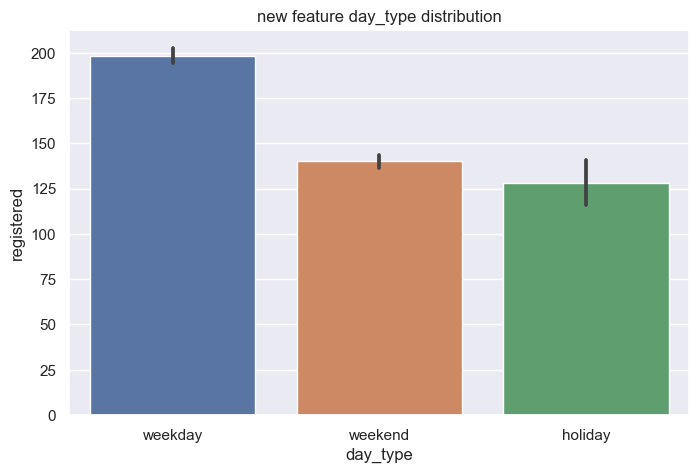

In [62]:
plt.figure(figsize=(8,5))
sns.barplot(x=df_model['day_type'], y=df_model['registered'])
plt.title("new feature day_type distribution")

terlihat bahwa sebaran nya cukup merata

selanjutnya saya lakukan uji statistik untuk melihat apakah kelompok `day_type` membuat perbedaan yang signifikan terhadap count of users (`registered` dan `casual`)

In [63]:
# cek distribusi kolom registered
from scipy.stats import normaltest
stats, pval=normaltest(df_model['registered'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho 

tidak normal


In [64]:
# cek distribusi kolom casual
from scipy.stats import normaltest
stats, pval=normaltest(df_model['casual'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho 

tidak normal


In [65]:
# uji statistik, apakah perbedaan kelompok `day_type` dengan count of registered users signifikan atau tidak.
# karena distribusi data tidak normal, Kruskal-Wallis
from scipy.stats import kruskal
stats,pval=kruskal(*[df_model[df_model['day_type']==i]['registered'] for i in df_model['day_type'].unique()])
if pval <= 0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Tolak Ho


In [66]:
# uji statistik, apakah perbedaan kelompok `day_type` dengan count of casual users signifikan atau tidak.
# karena distribusi data tidak normal, Kruskal-Wallis
from scipy.stats import kruskal
stats,pval=kruskal(*[df_model[df_model['day_type']==i]['casual'] for i in df_model['day_type'].unique()])
if pval <= 0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Tolak Ho


Ternyata memang ada perbedaan yang signifikan antara kelompok `day_type` dengan count of users (`registered` dan `casual`)

##### 2.2 `is_weekend`

Dari hasil analisis sebelumnya dan juga berdasarkan *common sense* biasanya status weekend atau tidak mempengaruhi jumlah sepeda yang disewa. Maka disini saya juga membuat fitur baru yaitu `is_weekend` apakah hari tersebut hari sabtu/minggu atau tidak.

In [67]:
df_model['day'].unique()

array(['Friday', 'Sunday', 'Wednesday', 'Saturday', 'Tuesday', 'Monday',
       'Thursday'], dtype=object)

In [68]:
df_model.loc[df_model['day'].isin(["Saturday", "Sunday"]), 'is_weekend'] = 1
df_model.loc[~df_model['day'].isin(["Saturday", "Sunday"]), 'is_weekend'] = 0

In [69]:
df_model['is_weekend'] =  df_model['is_weekend'].astype(int)
df_model['is_weekend'].value_counts()

0    7166
1    3098
Name: is_weekend, dtype: int64

Sekarang, mari kita lihat, apakah perbedaan count of users (`registered` maupun `casual`) antara kedua kelompok `is_weekend` signifikan atau tidak.

In [70]:
# uji statistik, apakah ada perbedaan count of registered users antara weekend atau tidak
# karena distribusi data tidak normal, gunakan mann whitney
from scipy.stats import mannwhitneyu
stats,pval=mannwhitneyu(*[df_model[df_model['is_weekend']==i]['registered'] for i in df_model['is_weekend'].unique()])
if pval <= 0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Tolak Ho


In [71]:
# uji statistik, apakah ada perbedaan count of casual users antara weekend atau tidak
# karena distribusi data tidak normal, gunakan mann whitney
from scipy.stats import mannwhitneyu
stats,pval=mannwhitneyu(*[df_model[df_model['is_weekend']==i]['casual'] for i in df_model['is_weekend'].unique()])
if pval <= 0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Tolak Ho


Ternyata, memang ada perbedaan count of users (`registered` maupun `casual`) yang signifikan antara hari weekend atau tidak

In [72]:
df_model.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,registered_log,casual_log,day,month,year,quarter,day_type,is_weekend
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250,5.424950,3.218876,Friday,12,2011,2011_Q4,weekday,0
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18,2.833213,1.098612,Sunday,06,2012,2012_Q2,weekend,1
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107,4.510860,2.890372,Wednesday,06,2011,2011_Q2,weekday,0
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145,4.844187,2.995732,Saturday,03,2012,2012_Q1,weekend,1
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857,6.632002,4.605170,Tuesday,07,2012,2012_Q3,weekday,0


##### 2.3 `HourBin_registered` dan `HourBin_casual`

Selanjutnya saya akan membuat kategori hours dengan teknik *binning* , secara terpisah untuk registered dan casual users.

Disini saya akan menggunakan teknik decision tree untuk menentukan jumlah bin atau kategori yang tepat [link](https://towardsdatascience.com/essential-guide-to-perform-feature-binning-using-a-decision-tree-model-90bcc66d61f9)

`HourBin_registered` (hours bin untuk registered users)

In [73]:
df_copy = df_model.copy()

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

X = df_copy[['hr']].astype(int)
y = df_copy['registered']
params = {'max_depth':[2,3,4], 'min_samples_split':[2,3,5,10]}
clf_dt = DecisionTreeClassifier()
clf = GridSearchCV(clf_dt, param_grid=params, scoring='accuracy')
clf.fit(X, y)
clf.best_params_

{'max_depth': 3, 'min_samples_split': 2}

In [75]:
tree_model = DecisionTreeClassifier(max_depth=3, min_samples_split= 2)
tree_model.fit(df_copy[['hr']], df_copy['registered'])
df_copy['hr_tree_reg']=tree_model.predict_proba(df_copy[['hr']])[:,1] 
df_copy.head(10)

pd.concat([df_copy.groupby('hr_tree_reg')['hr'].min(),
            df_copy.groupby('hr_tree_reg')['hr'].max()], axis=1, levels=['min', 'max'])

,hr,hr
hr_tree_reg,,
0.000000,7,23
0.002288,0,0
0.005618,6,6
0.016949,1,1
0.037838,5,5
0.052101,2,4


dari hasil di atas maka kita akan membagi kolom `hr` menjadi 7 kategori untuk `registered` users

In [76]:
df_model.loc[df_model['hr']==0, 'HourBin_registered'] = 0
df_model.loc[df_model['hr']==1, 'HourBin_registered'] = 1
df_model.loc[(df_model['hr']>=2) & (df_model['hr']<=4) , 'HourBin_registered'] = 2
df_model.loc[df_model['hr']==5, 'HourBin_registered'] = 3
df_model.loc[(df_model['hr']==6),'HourBin_registered'] = 4
df_model.loc[(df_model['hr']>=7) & (df_model['hr']<=23) , 'HourBin_registered'] = 5

Text(0.5, 1.0, 'new feature HourBin_registered distribution')

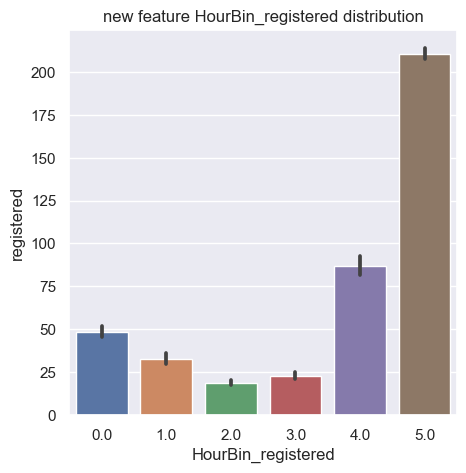

In [77]:
plt.figure(figsize=(5,5))
sns.barplot(x=df_model['HourBin_registered'], y=df_model['registered'])
plt.title("new feature HourBin_registered distribution")

Sekarang, mari kita lihat, apakah perbedaan count of `registered` users antara  kelompok `HourBin_registered` signifikan atau tidak.

In [78]:
# uji statistik, apakah perbedaan kelompok `HourBin_registered` dengan count of registered users signifikan atau tidak.
# karena distribusi data tidak normal, Kruskal-Wallis
from scipy.stats import kruskal
stats,pval=kruskal(*[df_model[df_model['HourBin_registered']==i]['registered'] for i in df_model['HourBin_registered'].unique()])
if pval <= 0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Tolak Ho


Ternyata, memang ada perbedaan count of `registered` users yang signifikan antara kelompok `HourBin_registered`

`HourBin_casual` (hours bin untuk casual users)

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

X = df_copy[['hr']].astype(int)
y = df_copy['casual']
params = {'max_depth':[2,3,4], 'min_samples_split':[2,3,5,10]}
clf_dt = DecisionTreeClassifier()
clf = GridSearchCV(clf_dt, param_grid=params, scoring='accuracy')
clf.fit(X, y)
clf.best_params_

{'max_depth': 4, 'min_samples_split': 2}

In [80]:
tree_model = DecisionTreeClassifier(max_depth=4, min_samples_split= 2)
tree_model.fit(df_copy[['hr']], df_copy['casual'])
df_copy['hr_tree_cas']=tree_model.predict_proba(df_copy[['hr']])[:,1] 
df_copy.head(10)

pd.concat([df_copy.groupby('hr_tree_cas')['hr'].min(),
            df_copy.groupby('hr_tree_cas')['hr'].max()], axis=1)

,hr,hr
hr_tree_cas,,
0.012208,10,20
0.026477,8,9
0.049370,21,22
0.060606,23,23
0.064018,7,7
0.107551,0,0
0.118644,1,1
0.147752,2,3
0.154494,6,6


dari hasil di atas maka kita akan membagi kolom `hr` menjadi 10 kategori untuk `casual` users

In [81]:
df_model.loc[df_model['hr']==0, 'HourBin_casual'] = 0
df_model.loc[df_model['hr']==1, 'HourBin_casual'] = 1
df_model.loc[(df_model['hr']==2) | (df_model['hr']==3), 'HourBin_casual'] = 2
df_model.loc[(df_model['hr']==4) | (df_model['hr']==5) , 'HourBin_casual'] = 3
df_model.loc[df_model['hr']==6, 'HourBin_casual'] = 4
df_model.loc[df_model['hr']==7, 'HourBin_casual'] = 5
df_model.loc[(df_model['hr']==8) | (df_model['hr']==9) , 'HourBin_casual'] = 6
df_model.loc[(df_model['hr']>=10) & (df_model['hr']<=20) , 'HourBin_casual'] = 7
df_model.loc[(df_model['hr']==21) | (df_model['hr']==22) , 'HourBin_casual'] = 8
df_model.loc[df_model['hr']==23, 'HourBin_casual'] = 9

Text(0.5, 1.0, 'new feature HourBin_casual distribution')

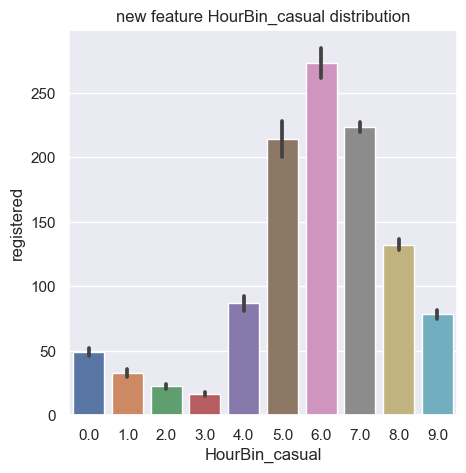

In [82]:
plt.figure(figsize=(5,5))
sns.barplot(x=df_model['HourBin_casual'], y=df_model['registered'])
plt.title("new feature HourBin_casual distribution")

Sekarang, mari kita lihat, apakah perbedaan count of casual users antara kelompok `HourBin_casual` signifikan atau tidak.

In [83]:
# uji statistik, apakah perbedaan kelompok `HourBin_casual` dengan count of casual users signifikan atau tidak.
# karena distribusi data tidak normal, Kruskal-Wallis
from scipy.stats import kruskal
stats,pval=kruskal(*[df_model[df_model['HourBin_casual']==i]['casual'] for i in df_model['HourBin_casual'].unique()])
if pval <= 0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Tolak Ho


Ternyata, memang ada perbedaan count of `casual` users yang signifikan antara kelompok `HourBin_casual`

##### 2.4 `TempBin_registered` dan `TempBin_casual`

Dengan cara yang sama seperti di atas, saya akan membuat kategori dari kolom `temp` menggunakan teknik binning decision tree untuk masing-masing registered dan casual users.

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

X = df_copy[['temp']]
y = df_copy['registered']
params = {'max_depth':[2,3,4,5,6], 'min_samples_split':[2,3,5,10]}
clf_dt = DecisionTreeClassifier()
clf = GridSearchCV(clf_dt, param_grid=params, scoring='accuracy')
clf.fit(X, y)
clf.best_params_

{'max_depth': 3, 'min_samples_split': 2}

In [85]:
tree_model = DecisionTreeClassifier(max_depth=3, min_samples_split= 2)
tree_model.fit(df_copy[['temp']], df_copy['registered'])
df_copy['temp_tree_reg']=tree_model.predict_proba(df_copy[['temp']])[:,1] 
df_copy.head(10)

pd.concat([df_copy.groupby('temp_tree_reg')['temp'].min(),
            df_copy.groupby('temp_tree_reg')['temp'].max()], axis=1)

,temp,temp
temp_tree_reg,,
0.000000,0.02,1.00
0.002445,0.72,0.84
0.003735,0.12,0.32
0.004066,0.48,0.70
0.008218,0.34,0.46


dari hasil di atas maka kita akan membagi kolom `temp` menjadi 19 kategori untuk `registered` users

In [86]:
df_model.loc[(df_model['temp']==0.02) | (df_model['temp']==1.00), 'TempBin_registered'] = 0
df_model.loc[(df_model['temp']>0.02) & (df_model['temp']<=0.32), 'TempBin_registered'] = 1
df_model.loc[(df_model['temp']>0.32) & (df_model['temp']<=0.46), 'TempBin_registered'] = 2
df_model.loc[(df_model['temp']>0.46) & (df_model['temp']<=0.70), 'TempBin_registered'] = 3
df_model.loc[(df_model['temp']>0.70) & (df_model['temp']< 1.0 ), 'TempBin_registered'] = 4

Text(0.5, 1.0, 'new feature TempBin_registered distribution')

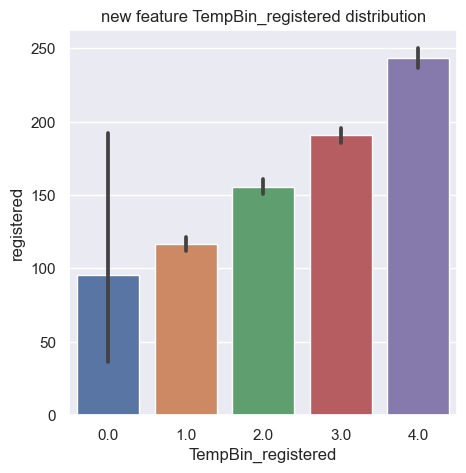

In [87]:
plt.figure(figsize=(5,5))
sns.barplot(x=df_model['TempBin_registered'], y=df_model['registered'])
plt.title("new feature TempBin_registered distribution")

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

X = df_copy[['temp']]
y = df_copy['casual']
params = {'max_depth':[2,3,4,5,6], 'min_samples_split':[2,3,5,10]}
clf_dt = DecisionTreeClassifier()
clf = GridSearchCV(clf_dt, param_grid=params, scoring='accuracy')
clf.fit(X, y)
clf.best_params_

{'max_depth': 2, 'min_samples_split': 2}

In [89]:
tree_model = DecisionTreeClassifier(max_depth=2, min_samples_split= 2)
tree_model.fit(df_copy[['temp']], df_copy['casual'])
df_copy['temp_tree_cas']=tree_model.predict_proba(df_copy[['temp']])[:,1] 
df_copy.head(10)

pd.concat([df_copy.groupby('temp_tree_cas')['temp'].min(),
            df_copy.groupby('temp_tree_cas')['temp'].max()], axis=1)

,temp,temp
temp_tree_cas,,
0.010643,0.70,1.00
0.037024,0.36,0.68
0.083277,0.26,0.34
0.150063,0.02,0.24


dari hasil di atas maka kita akan membagi kolom `temp` menjadi 8 kategori untuk `casual` users

In [90]:
df_model.loc[(df_model['temp']>0) & (df_model['temp']<=0.24), 'TempBin_casual'] = 0
df_model.loc[(df_model['temp']>0.24) & (df_model['temp']<=0.34), 'TempBin_casual'] = 1
df_model.loc[(df_model['temp']>0.34) & (df_model['temp']<=0.68), 'TempBin_casual'] = 2
df_model.loc[(df_model['temp']>0.68), 'TempBin_casual'] = 3

Text(0.5, 1.0, 'new feature TempBin_casual distribution')

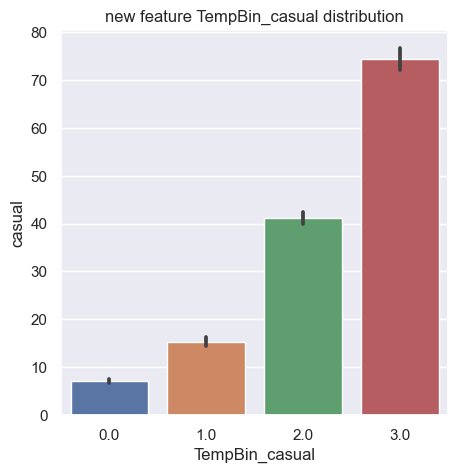

In [91]:
plt.figure(figsize=(5,5))
sns.barplot(x=df_model['TempBin_casual'], y=df_model['casual'])
plt.title("new feature TempBin_casual distribution")

##### 2.5 `HumBin_registered` dan `HumBin_casual`

`HumBin_registered` 

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

X = df_copy[['hum']]
y = df_copy['registered']
params = {'max_depth':[2,3,4,5,6], 'min_samples_split':[2,3,5,10]}
clf_dt = DecisionTreeClassifier()
clf = GridSearchCV(clf_dt, param_grid=params, scoring='accuracy')
clf.fit(X, y)
clf.best_params_

{'max_depth': 2, 'min_samples_split': 2}

In [93]:
tree_model = DecisionTreeClassifier(max_depth=2, min_samples_split= 2)
tree_model.fit(df_copy[['hum']], df_copy['registered'])
df_copy['hum_tree_reg']=tree_model.predict_proba(df_copy[['hum']])[:,1] 
df_copy.head(10)

pd.concat([df_copy.groupby('hum_tree_reg')['hum'].min(),
            df_copy.groupby('hum_tree_reg')['hum'].max()], axis=1)

,hum,hum
hum_tree_reg,,
0.001997,0.08,0.51
0.003341,0.52,0.63
0.004827,0.64,0.83
0.012602,0.84,1.00


In [94]:
df_model.loc[(df_model['hum']>=0) & (df_model['hum']<=0.51), 'HumBin_registered'] = 0
df_model.loc[(df_model['hum']>=0.52) & (df_model['hum']<=0.63), 'HumBin_registered'] = 1
df_model.loc[(df_model['hum']>=0.64) & (df_model['hum']<=0.83), 'HumBin_registered'] = 2
df_model.loc[(df_model['hum']>=0.84) & (df_model['hum']<=1.00), 'HumBin_registered'] = 3

Text(0.5, 1.0, 'new feature HumBin_registered distribution')

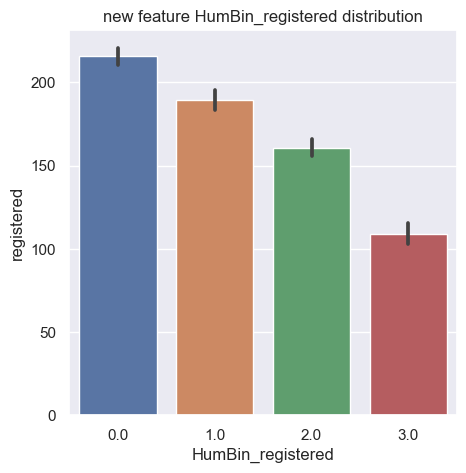

In [95]:
plt.figure(figsize=(5,5))
sns.barplot(x=df_model['HumBin_registered'], y=df_model['registered'])
plt.title("new feature HumBin_registered distribution")

`HumBin_casual` 

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

X = df_copy[['hum']]
y = df_copy['casual']
params = {'max_depth':[2,3,4,5,6], 'min_samples_split':[2,3,5,10]}
clf_dt = DecisionTreeClassifier()
clf = GridSearchCV(clf_dt, param_grid=params, scoring='accuracy')
clf.fit(X, y)
clf.best_params_

{'max_depth': 3, 'min_samples_split': 2}

In [97]:
tree_model = DecisionTreeClassifier(max_depth=3, min_samples_split= 2)
tree_model.fit(df_copy[['hum']], df_copy['casual'])
df_copy['hum_tree_reg']=tree_model.predict_proba(df_copy[['hum']])[:,1] 
df_copy.head(10)

pd.concat([df_copy.groupby('hum_tree_reg')['hum'].min(),
            df_copy.groupby('hum_tree_reg')['hum'].max()], axis=1)

,hum,hum
hum_tree_reg,,
0.018519,0.08,0.43
0.032267,0.44,0.63
0.035714,0.85,0.86
0.051715,0.64,0.74
0.063830,0.75,0.84
0.096889,0.87,0.97
0.170732,1.00,1.00


In [98]:
df_model.loc[(df_model['hum']>=0) & (df_model['hum']<=0.43), 'HumBin_casual'] = 0
df_model.loc[(df_model['hum']>=0.44) & (df_model['hum']<=0.63), 'HumBin_casual'] = 1
df_model.loc[(df_model['hum']>=0.64) & (df_model['hum']<=0.74), 'HumBin_casual'] = 2
df_model.loc[(df_model['hum']>=0.75) & (df_model['hum']<=0.84), 'HumBin_casual'] = 3
df_model.loc[(df_model['hum']==0.85) | (df_model['hum']==0.86), 'HumBin_casual'] = 4
df_model.loc[(df_model['hum']>=0.87) & (df_model['hum']<=0.97), 'HumBin_casual'] = 5
df_model.loc[(df_model['hum']>=0.98) & (df_model['hum']<=1.00), 'HumBin_casual'] = 6

Text(0.5, 1.0, 'new feature HumBin_registered distribution')

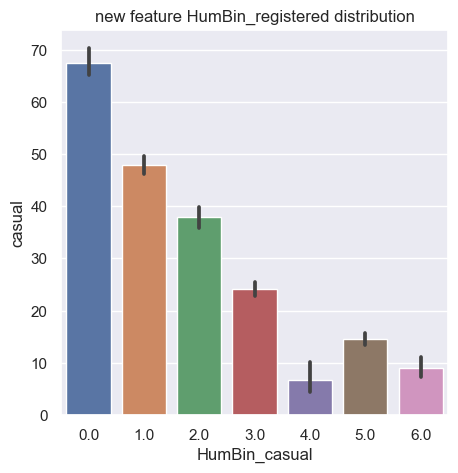

In [99]:
plt.figure(figsize=(5,5))
sns.barplot(x=df_model['HumBin_casual'], y=df_model['casual'])
plt.title("new feature HumBin_registered distribution")

##### 2.6 `vapour_pressure`

Dari sumber yang saya dapatkan [apparent temperature formula](https://code.adonline.id.au/calculating-feels-like-temperatures/) , bisa didapatkan besar *vapour pressure*  dari data temperatur lingkungan (`temp`). Tapi sebelumnya kita convert dulu unit kedua kolom tersebut menjadi &deg;C 

In [100]:
df_temp = df_model.copy()

In [101]:
df_temp = df_model[['temp', 'atemp', 'hum', 'registered', 'casual']]

In [102]:
df_temp['temp_celcius'] = df_temp['temp']*(39+8) - 8
df_temp['atemp_celcius'] = df_temp['atemp']*(50+16) - 16

In [103]:
df_temp

,temp,atemp,hum,registered,casual,temp_celcius,atemp_celcius
0,0.36,0.3485,0.62,226,24,8.92,7.0010
1,0.54,0.5152,0.64,16,2,17.38,18.0032
2,0.62,0.6212,0.53,90,17,21.14,24.9992
3,0.36,0.3485,0.87,126,19,8.92,7.0010
4,0.76,0.6970,0.55,758,99,27.72,30.0020
...,...,...,...,...,...,...,...
12159,0.72,0.6667,0.54,296,41,25.84,28.0022
12160,0.24,0.2273,0.75,243,14,3.28,-0.9982
12161,0.78,0.7424,0.62,63,39,28.66,32.9984
12163,0.42,0.4242,0.77,55,14,11.74,11.9972


Formula dari *vapour pressure* dalam hPa jika diketahui ambient temperature (`temp_celcius`) dalam celcius :

$$p = RH \times 6.105 \times e^{17.27 \times T_{a} \over {237.7 + T_{a}}} $$

dimana :

* p : *vapour pressure* atau tekanan yang diberikan oleh uap dalam kesetimbangan termodinamika dengan fase terkondensasi (padat atau cair) pada suhu tertentu dalam sistem tertutup

* RH : Relative Humidity (kolom `hum`)
* T_{a} : ambient temperature atau suhu sekitar/lingkungan (kolom `temp_celcius`)

In [104]:
df_temp['vapour_pressure'] = df_temp['hum']*6.105*(np.exp((17.27*df_temp['temp_celcius'])/(237.7+df_temp['temp_celcius'])))

In [105]:
df_model['vapour_pressure'] = df_temp['vapour_pressure']

In [106]:
df_model['vapour_pressure'].max()

32.70970864532494

agar konsisten dengan variabel yang lainnya, disini saya akan menormalisasi kolom `vapour pressure` denagan membaginya dengan nilai maksimum nya

In [107]:
df_model['vapour_pressure'] = df_model['vapour_pressure']/ df_model['vapour_pressure'].max()

Text(0.5, 1.0, 'vapour_pressure and cnt coreelation')

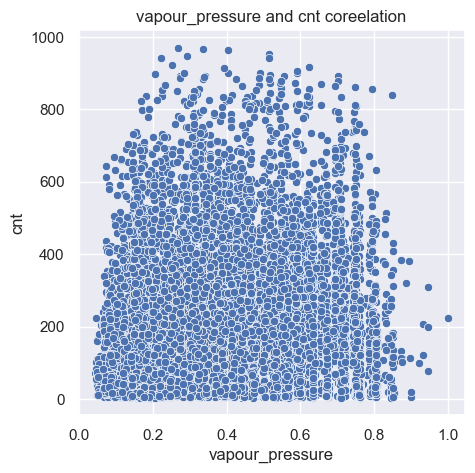

In [108]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=df_model['vapour_pressure'], y=df['cnt'])
plt.title("vapour_pressure and cnt coreelation")

##### 2.7 `cluster`

In [109]:
from sklearn.cluster import KMeans
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

In [110]:
features = ['hr', 'hum', 'weathersit', 'temp']
df_cluster = df_model[features]

In [111]:
label_enc = LabelEncoder()

In [112]:
cat_cols = ['day', 'month', 'year', 'quarter', 'day_type']

for col in cat_cols: 
    df_cluster[col] = label_enc.fit_transform(df_model[col])

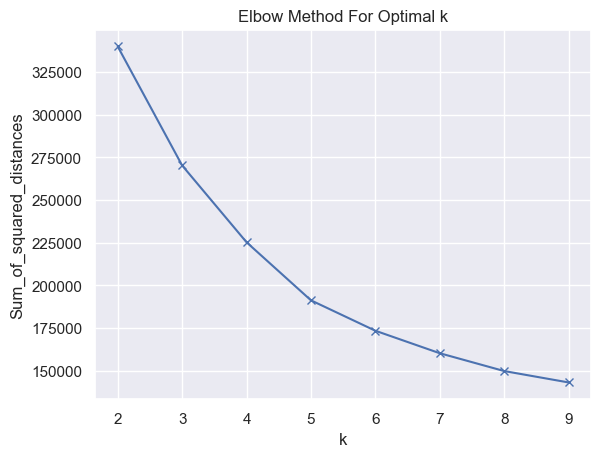

In [113]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(df_cluster)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title(f'Elbow Method For Optimal k')
plt.show()

Dengan menggunakan metode elbow, didapatkan nilai klaster terbaik yaitu 5

In [114]:
km = KMeans(n_clusters=5, max_iter=200, n_init=10)
km = km.fit(df_cluster)
labels=km.labels_
df_cluster.loc[:, 'cluster_kmeans'] = labels

In [115]:
df_model['cluster'] = df_cluster['cluster_kmeans']

##### 2.8 `week_of_year`

In [116]:
df_model['week_of_year'] = df_model['dteday'].dt.week

<AxesSubplot: xlabel='week_of_year', ylabel='casual'>

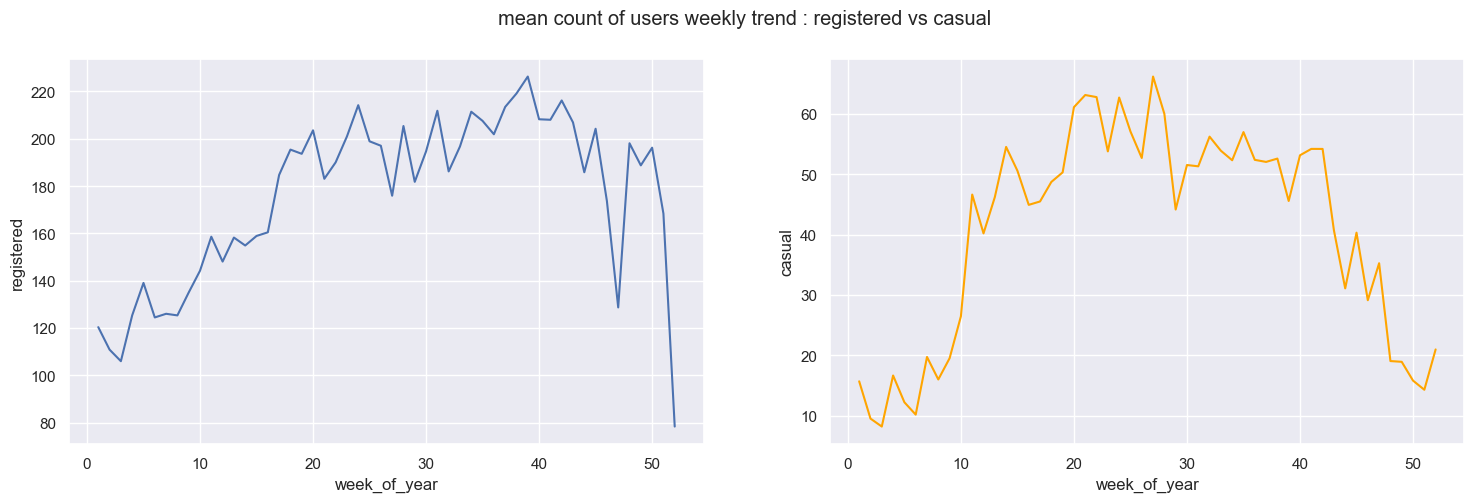

In [117]:
fig, axes = plt.subplots(1, 2, figsize=(18,5))
fig.suptitle('mean count of users weekly trend : registered vs casual')
sns.lineplot(ax=axes[0] , data=df_model.groupby(['week_of_year'])['registered'].mean())
sns.lineplot(ax=axes[1] , data=df_model.groupby(['week_of_year'])['casual'].mean(), color='orange')

<AxesSubplot: xlabel='week_of_year', ylabel='casual'>

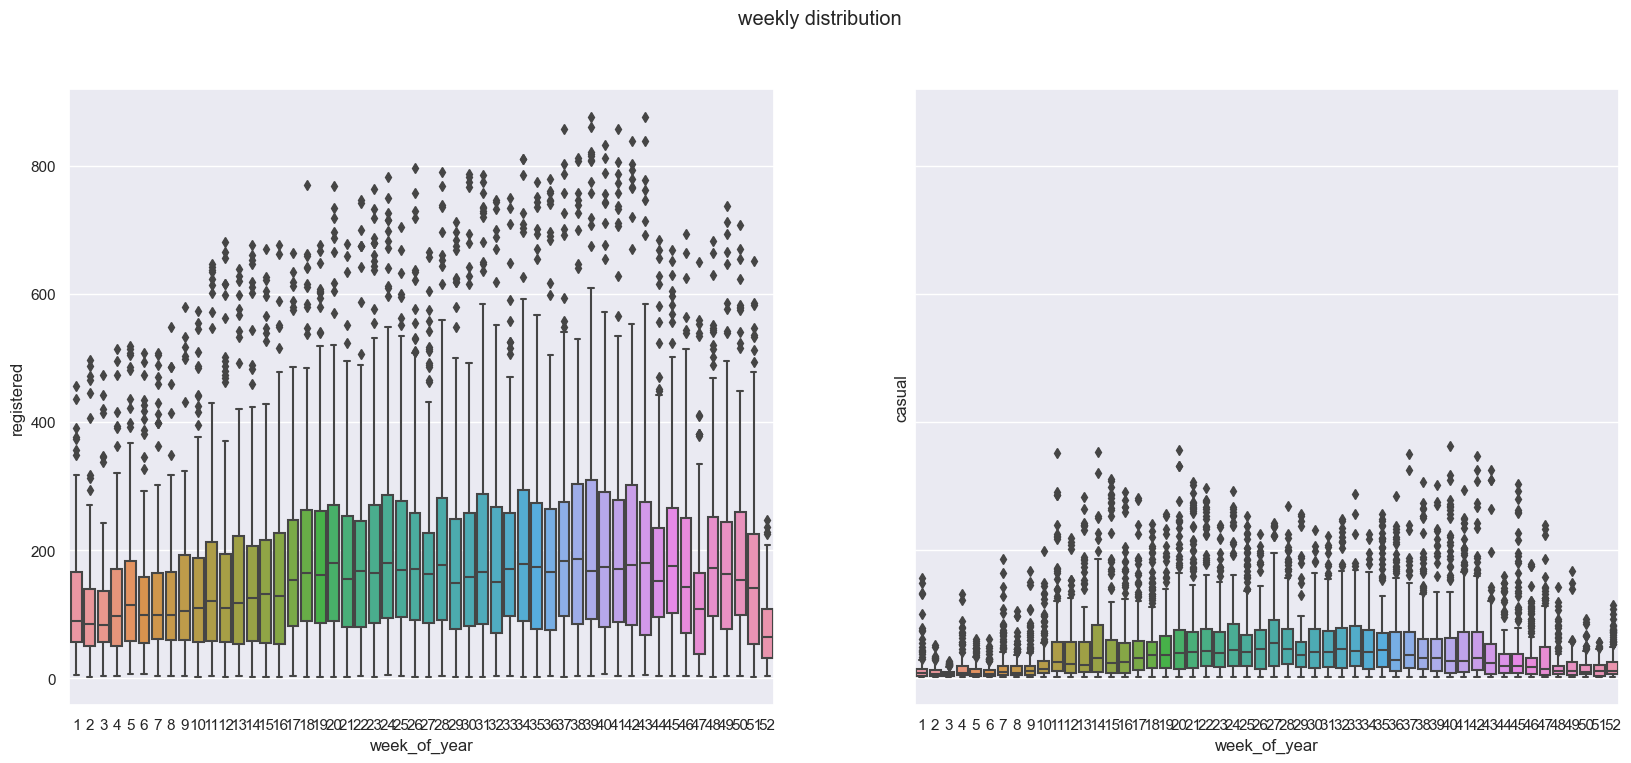

In [118]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(20,8))
fig.suptitle('weekly distribution')
sns.boxplot(ax=axes[0] ,x=df_model['week_of_year'], y=df_model['registered'])
sns.boxplot(ax=axes[1] ,x=df_model['week_of_year'], y=df_model['casual'])

In [119]:
df_model[['day', 'week_of_year', 'month', 'quarter', 'year']]

,day,week_of_year,month,quarter,year
0,Friday,49,12,2011_Q4,2011
1,Sunday,24,06,2012_Q2,2012
2,Wednesday,24,06,2011_Q2,2011
3,Saturday,13,03,2012_Q1,2012
4,Tuesday,31,07,2012_Q3,2012
...,...,...,...,...,...
12159,Thursday,33,08,2012_Q3,2012
12160,Wednesday,4,01,2012_Q1,2012
12161,Friday,27,07,2012_Q3,2012
12163,Saturday,13,03,2012_Q1,2012


#### 3. Drop Columns

Selanjutnya saya akan drop beberapa kolom yang tidak relevan untuk pemodelan atau kolom yang nilai nya sudah dimodifikasi (seperti data tanggal, karena bulan hari dll sudah di ekstrak).

Selain itu, untuk kolom `registered_log` dan `casual_log` juga akan di drop, karena nantinya saat pemodelan, saya akan menggunakan TransformedTargetRegressor dengan fungsi logaritmik untuk mentransform target agar tidak ada nilai negatif.

In [120]:
a = df_model.copy()

In [121]:
df_model = df_model.drop(['dteday', 'holiday', 'registered_log', 'casual_log'], axis=1)

****Data yang sudah bersih****

In [122]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)])

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)

df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,hum,float64,0,0.0,87,"[0.35, 0.25]"
1,weathersit,int64,0,0.0,3,"[3, 1]"
2,season,int64,0,0.0,4,"[3, 1]"
3,atemp,float64,0,0.0,63,"[0.4545, 0.6364]"
4,temp,float64,0,0.0,50,"[0.96, 0.16]"
5,hr,int64,0,0.0,24,"[18, 8]"
6,casual,int64,0,0.0,303,"[75, 269]"
7,registered,int64,0,0.0,740,"[46, 708]"
8,cnt,int64,0,0.0,827,"[204, 754]"
9,day,object,0,0.0,7,"[Monday, Tuesday]"


In [123]:
df_model.shape

(10264, 24)

DI terakhir, dataset kita yang akan kita gunakan untuk pemodelan, tersisa 10264 baris dari awalnya 12165 atau sekitar 15.26% baris saya drop sesuai dengan asumsi dan argumen yang disampaikan di proses-proses sebelumnya. Tapi dengan feature engineering saya membuat 14 fitur baru dari fitur awal

New Features :  `day`, `month`, `year`, `quarter`, `day_type`, `is_weekend`,
                `HourBin_registered`, `HourBin_casual`, `TempBin_registered`,
                `TempBin_casual`, `HumBin_registered`, `HumBin_casual`,
                `vapour_pressure`, `week_of_year`

### MODELING

In [124]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error, make_scorer

Categorical Data Encoding

Agar dapat menggunakan semua fitur yang dipilih, maka fitur-fitur kategorikal harus diubah menjadi fitur numerikal. Kita dapat menggunakan ColumnTransformer untuk dapat mengubah tipe datanya (untuk data kategori), yang mana nanti dapat diaplikasikan pada pipeline model. Sedangkan untuk data numerik saya akan lakukan scaling dengan standard scaler

In [125]:
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,hum,float64,0,0.0,87,"[0.35, 0.25]"
1,weathersit,int64,0,0.0,3,"[3, 1]"
2,season,int64,0,0.0,4,"[3, 1]"
3,atemp,float64,0,0.0,63,"[0.4545, 0.6364]"
4,temp,float64,0,0.0,50,"[0.96, 0.16]"
5,hr,int64,0,0.0,24,"[18, 8]"
6,casual,int64,0,0.0,303,"[75, 269]"
7,registered,int64,0,0.0,740,"[46, 708]"
8,cnt,int64,0,0.0,827,"[204, 754]"
9,day,object,0,0.0,7,"[Monday, Tuesday]"


Untuk pemodelan selanjutnya, disini saya akan pisahkan antara model untuk registered users dengan model untuk casual users. Karena jika dilihat dari hasilm EDA, kedua user ini memiliki pola yang berbeda di beberapa fitur. untuk hasil akhirnya baru kita gabungkan hasil prediksi nya (total users = registered + casual)

In [126]:
#Data Numerik
numeric_features_reg = ['hum', 'atemp', 'temp', 'hr', 'vapour_pressure', 'week_of_year']

numeric_features_cas = ['hum', 'atemp', 'temp', 'hr', 'vapour_pressure', 'week_of_year']


#Data Kategori
# Mengubah fitur kategorikal menjadi numerikal dan standard scaler untuk fitur numerical
transformer_reg = ColumnTransformer([
    ('scaler', StandardScaler(), numeric_features_reg),
    ('one hot', OneHotEncoder(sparse=False), ['year', 'day_type', 'is_weekend', 'season', 'cluster', 'weathersit']),
    ('binary', ce.BinaryEncoder(return_df=True), ['day', 'month', 'quarter', 
                                                  'HourBin_registered','TempBin_registered', 'HumBin_registered'])
], remainder='passthrough')

transformer_cas = ColumnTransformer([
    ('scaler',  StandardScaler(), numeric_features_cas),
    ('one hot', OneHotEncoder(), ['year', 'day_type', 'is_weekend', 'season', 'cluster', 'weathersit']),
    ('binary', ce.BinaryEncoder(), ['day', 'month', 'quarter',
                                    'HourBin_casual','TempBin_casual', 'HumBin_casual'])
], remainder='passthrough')

In [127]:
# buat copy data agar lebih aman
df_copy = df_model.copy()

Pisahkan fitur (X) dengan target (y)

In [128]:
X = df_copy.drop(['casual', 'cnt', 'registered'], axis=1)
y = df_copy[['registered', 'casual', 'cnt']]

Train and Test Data Splitting dengan komposisi Data train 80% dan data evaluasi 20%

In [129]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.2,
    random_state=1)

Pada pemodelan kali ini saya akan memprediksi jumlah pengguna (count of users) `registered` dan `casual` secara terpisah karena jika dilihat dari analisis (EDA) beberapa fitur memiliki sebaran dan karakteristik yang berbeda antara pengguna teregister dengan yang kasual. Sehingga nantinya kita akan punya dua model untuk masing-masing jenis pengguna (users).

Hasil akhirnya juga untuk Jumlah penggunal total (kolom `cnt`) tinggal kita tambahkan kedua nya.

Catatan : `cnt` = `registered` + `casual`

In [130]:
# Memisahkan data independen variabel dengan target (registered users)
X_train_reg = X_train.drop(['TempBin_casual', 'HourBin_casual', 'HumBin_casual'], axis=1)
y_train_reg = y_train['registered']

# Memisahkan data independen variabel dengan target (casual users)
X_train_cas = X_train.drop(['TempBin_registered', 'HourBin_registered', 'HumBin_registered'], axis=1)
y_train_cas = y_train['casual']

**Choose a Benchmark Model**

In [131]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
sgd = SGDRegressor(random_state=1)
svr = SVR(kernel='rbf')
lasso = Lasso(random_state=1)
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)
lgbm = LGBMRegressor(random_state=1)
mlp = MLPRegressor(random_state=1, max_iter=500)


# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_sgd = TransformedTargetRegressor(sgd, func=np.log, inverse_func=np.exp)
log_svr = TransformedTargetRegressor(svr, func=np.log, inverse_func=np.exp)
log_lasso = TransformedTargetRegressor(lasso, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)
log_lgbm = TransformedTargetRegressor(lgbm, func=np.log, inverse_func=np.exp)
log_mlp= TransformedTargetRegressor(mlp, func=np.log, inverse_func=np.exp)


# Kandidat algoritma
models = [log_lr, log_knn, log_sgd, log_svr, log_lasso, log_dt, log_rf, log_xgb, log_lgbm]

def model_benchmarking (models, X, y, type) : 
    score_rmse = []
    nilai_mean_rmse = []
    nilai_std_rmse = []

    score_mae = []
    nilai_mean_mae = []
    nilai_std_mae = []

    score_smape = []
    nilai_mean_smape = []
    nilai_std_smape = []

    score_rmsle = []
    nilai_mean_rmsle = []
    nilai_std_rmsle = []

    # Mencari algoritma terbaik berdasarkan tiap metrics
    for i in models:
        
        crossval = KFold(n_splits=5, shuffle=True, random_state=1)

        if type=='registered' : 
            TRANSFORMER = transformer_reg
        elif type=='casual' :
            TRANSFORMER = transformer_cas
            

        estimator = Pipeline([
            ('preprocessing', TRANSFORMER),
            ('model', i)
        ])

        # RMSE
        model_cv_rmse = cross_val_score(
            estimator, 
            X, 
            y, 
            cv=crossval, 
            scoring='neg_root_mean_squared_error', 
            error_score='raise'
            )

        print(model_cv_rmse, i)

        score_rmse.append(model_cv_rmse)
        nilai_mean_rmse.append(model_cv_rmse.mean())
        nilai_std_rmse.append(model_cv_rmse.std())

        # MAE
        model_cv_mae = cross_val_score(
            estimator, 
            X, 
            y, 
            cv=crossval, 
            scoring='neg_mean_absolute_error', 
            error_score='raise'
            )

        print(model_cv_mae, i)

        score_mae.append(model_cv_mae)
        nilai_mean_mae.append(model_cv_mae.mean())
        nilai_std_mae.append(model_cv_mae.std())

        # sMAPE

        def smape(actual, predict):
            return 1/len(actual) * np.sum(2 * np.abs(predict - actual) / (np.abs(actual) + np.abs(predict)))
        
        sMAPE = make_scorer(smape, greater_is_better=False)

        model_cv_mape = cross_val_score(
            estimator, 
            X, 
            y, 
            cv=crossval, 
            scoring=sMAPE, 
            error_score='raise'
            )

        print(model_cv_mape, i)

        score_smape.append(model_cv_mape)
        nilai_mean_smape.append(model_cv_mape.mean())
        nilai_std_smape.append(model_cv_mape.std())

        # RMSLE

        scoring=make_scorer(mean_squared_log_error, greater_is_better=False, squared=False)
        
        model_cv_rmsle = cross_val_score(
            estimator, 
            X, 
            y, 
            cv=crossval, 
            scoring=scoring, 
            error_score='raise'
            )
        
        score_rmsle.append(model_cv_rmsle)
        nilai_mean_rmsle.append(model_cv_rmsle.mean())
        nilai_std_rmsle.append(model_cv_rmsle.std())

    # Evaluasi hasil dari 5 kandidat algoritma yang digunakan
    hasil_benchmark_df = pd.DataFrame({'Model': ['Linear Regression', 'KNN Regressor', 'SGD Regressor', 'SVR', "Lasso",
                                                 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor', 'LGBM Regressor'],
                                        'Mean_RMSE': nilai_mean_rmse,
                                        'Std_RMSE': nilai_std_rmse,
                                        'Mean_MAE': nilai_mean_mae,
                                        'Std_MAE': nilai_std_mae,
                                        'Mean_sMAPE': nilai_mean_smape,
                                        'Std_sMAPE': nilai_std_smape,
                                        'Mean_RMSLE': nilai_mean_rmsle,
                                        'Std_RMSLE': nilai_std_rmsle,   
})
    return hasil_benchmark_df

In [132]:
display(model_benchmarking(models, X_train_reg, y_train_reg, 'registered'))
print("Hasil Model Benchmarking untuk registered users")

[-104.09618687 -106.38768329 -118.49664953 -112.62534393 -111.7194829 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-68.51307897 -70.57814725 -77.95276244 -74.38882406 -74.4737998 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.46501928 -0.45931637 -0.48781355 -0.47833621 -0.49620292] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[ -93.17995308 -100.29242154 -109.09885103 -103.4706973   -97.12675722] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-60.13999555 -64.38054595 -70.21719297 -65.32828827 -63.09724133] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegress

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_sMAPE,Std_sMAPE,Mean_RMSLE,Std_RMSLE
0,Linear Regression,-110.665069,5.054391,-73.181323,3.300431,-0.477338,0.013734,-0.666424,0.023204
1,KNN Regressor,-100.633736,5.434718,-64.632653,3.294723,-0.401272,0.009278,-0.550614,0.017690
2,SGD Regressor,-111.075777,5.146777,-73.884045,3.646244,-0.484276,0.015704,-0.670651,0.024867
3,SVR,-90.428735,3.920877,-57.382244,2.339038,-0.359227,0.006280,-0.498280,0.014422
4,Lasso,-162.983564,6.050811,-112.401002,3.914740,-0.717406,0.013371,-1.073365,0.021974
5,DecisionTree Regressor,-54.325476,2.860116,-33.309134,1.266991,-0.254399,0.006600,-0.398120,0.009694
6,RandomForest Regressor,-39.806839,2.579155,-24.890567,0.958322,-0.190617,0.004191,-0.287003,0.009681
7,XGBoost Regressor,-38.671314,1.817167,-24.166036,0.749278,-0.182923,0.001029,-0.268062,0.003667
8,LGBM Regressor,-38.774404,1.867734,-24.520177,1.098163,-0.182030,0.002186,-0.264009,0.006482


Hasil Model Benchmarking untuk registered users


*REGISTERED USERS*

Terdapat perbedaan cukup signifikan antara nilai RMSE dan MAE, di mana nilai RMSE lebih tinggi karena nilai residuals atau error-nya dikuadratkan terlebih dahulu sebelum dirata-ratakan. Hal ini menyebabkan RMSE akan memberikan 'weight' atau bobot yang lebih tinggi untuk nilai error yang besar. Dengan kata lain, terdapat nilai-nilai error yang besar yang dihasilkan oleh semua algoritma yang digunakan, sehingga ada perbedaan signifikan antara nilai RMSE dan MAE.

Berdasarkan nilai RMSE, MAE, sMAPE dan RSMLE terlihat bahwa model LGBM memiliki skor yang paling baik di antara yang lain. Tapi jika dilihat lebih teliti perbedaan skor antara model Random Forest, XGBoost dan LGBM tidak terlalu signifikan. Maka selanjutnya akan dilakukan prediski pada test set dengan 3 model tersebut. Selain itu dari hasil sMAPE yang didapatkan bisa dibilang cukup rendah pada ketiga model ini, yang menandakan nilai prediksi yang lebih tinggi jika dibandingkan nilai aktual (overestimation) dapat di handel dengan cukup baik pada prediksi registered users, karea sMAPE sensitif terhadap nilai prediksi yang overestimated. Sedangkan untuk RMSLE nya juga nilainya cukup kecil, yang artinya nilai prediksi yang lebih rendah dari nilai aktual nya (underestimation) dapat di handel dengan cukup baik juga, dimana RSMLE sensitif terhadap error pada nilai prediksi yang underestimated.

JELASIN

In [133]:
display(model_benchmarking(models, X_train_cas, y_train_cas, 'casual'))
print("Hasil Model Benchmarking untuk casual users")

[-33.47289135 -36.01414007 -33.8857669  -34.75579126 -38.87888962] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-18.61248775 -20.4512023  -18.39948498 -18.98960543 -21.72602044] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.50307993 -0.5087509  -0.49280159 -0.50875754 -0.51109878] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-22.09693369 -22.90919117 -22.86380092 -23.32471385 -23.7839387 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-13.08709288 -13.44798395 -12.64170063 -13.19335187 -14.02537131] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-0.

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_sMAPE,Std_sMAPE,Mean_RMSLE,Std_RMSLE
0,Linear Regression,-35.401496,1.944299,-19.635760,1.267053,-0.504898,0.006600,-0.635144,0.008343
1,KNN Regressor,-22.995716,0.558969,-13.279100,0.455179,-0.394860,0.006139,-0.501475,0.007053
2,SGD Regressor,-35.153368,1.521685,-19.625888,1.094708,-0.509482,0.005405,-0.639391,0.008606
3,SVR,-21.608999,1.050753,-12.388711,0.674675,-0.373047,0.006376,-0.466352,0.014726
4,Lasso,-54.958569,3.180597,-32.139944,2.009776,-0.850336,0.014034,-1.114780,0.022214
5,DecisionTree Regressor,-23.066414,0.638420,-13.815861,0.398880,-0.432819,0.004943,-0.572585,0.008436
6,RandomForest Regressor,-16.865336,0.743359,-10.008594,0.407325,-0.327766,0.003491,-0.409857,0.007798
7,XGBoost Regressor,-16.251824,0.908178,-9.675993,0.509402,-0.320434,0.004756,-0.401182,0.009763
8,LGBM Regressor,-16.738804,0.923427,-9.839830,0.518239,-0.316930,0.004542,-0.391531,0.010255


Hasil Model Benchmarking untuk casual users


*CASUAL USERS*

Untuk model prediksi pengguna kasual, hasil 3  benchmark model terbaik masih sama dengan model untuk pengguna terdaftar 
, yaitu Random Forest, XGBoost dan LGBM. Hanya saja kalau kita perhatikan nilai RMSE dan MAE nya memiliki perbedaan yang signifikan jika dibanding kan dengan model registered users. Ini dikarenakan rentang nilai (range) dari pengguna kasual lebih kecil dibandingkan dengan pengguna terdaftar (registered), sehingga didapatkan error rate absolut yang lebih kecil untuk pengguna kasual. Sebagai akibatnya nilai sMAPE dan RMSLE terlihat membesar juga karena nilai yang overestimated dan underestimated nya relatif lebih besar dibandingkan nilai aktualnya.

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model XGBoost, Random Forest, LGBM

In [134]:
# Memisahkan data independen variabel dengan target (registered users)
X_test_reg = X_test.drop(['TempBin_casual', 'HourBin_casual', 'HumBin_casual'], axis=1)
y_test_reg = y_test['registered']

# Memisahkan data independen variabel dengan target (casual users)
X_test_cas = X_test.drop(['TempBin_registered', 'HourBin_registered', 'HumBin_registered'], axis=1)
y_test_cas = y_test['casual']

In [135]:
# Benchmark 3 model terbaik
models = {
    'XGB': TransformedTargetRegressor(XGBRegressor(random_state=1), func=np.log, inverse_func=np.exp),
    'RandomForest': TransformedTargetRegressor(RandomForestRegressor(random_state=1), func=np.log, inverse_func=np.exp),
    'LGBM': TransformedTargetRegressor(LGBMRegressor(random_state=1), func=np.log, inverse_func=np.exp),
}

def model_testing (models, train_X, train_y, test_X, test_y, type) :
    score_rmse = []
    score_mae = []
    score_smape = []
    score_rmsle = []

    list_of_pred = []

    # Prediksi pada test set
    for i in models:

        if type=='registered' : 
            TRANSFORMER = transformer_reg
        elif type=='casual' :
            TRANSFORMER = transformer_cas

        model = Pipeline([
            ('preprocessing', TRANSFORMER),
            ('model', models[i])
            ])

        for j in range(2):
            model.fit(train_X, train_y)
        y_pred = model.predict(test_X)

        def smape(actual, predict):
            return 1/len(actual) * np.sum(2 * np.abs(predict - actual) / (np.abs(actual) + np.abs(predict)))
        
        score_rmse.append(np.sqrt(mean_squared_error(test_y, y_pred)))
        score_mae.append(mean_absolute_error(test_y, y_pred))
        score_smape.append(smape(test_y, y_pred))
        score_rmsle.append(mean_squared_log_error(test_y, y_pred, squared=False))

        list_of_pred.append(y_pred)

    score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'sMAPE' : score_smape, 'RMSLE' : score_rmsle}, index=models.keys())
    
    return list_of_pred, score_before_tuning


In [136]:
#registered users
print("Testing 3 model terbaik untuk registered users")
y_pred_reg, score_before_tuning_reg = model_testing(models, X_train_reg, y_train_reg, X_test_reg, y_test_reg, 'registered')
display(score_before_tuning_reg)

#casual users
print("Testing 3 model terbaik untuk casual users")
y_pred_cas, score_before_tuning_cas = model_testing(models, X_train_cas, y_train_cas, X_test_cas, y_test_cas, 'casual')
display(score_before_tuning_cas)

Testing 3 model terbaik untuk registered users


,RMSE,MAE,sMAPE,RMSLE
XGB,34.710111,21.802004,0.176358,0.258625
RandomForest,38.013913,23.341321,0.187251,0.285043
LGBM,38.169997,23.356281,0.181317,0.264573


Testing 3 model terbaik untuk casual users


,RMSE,MAE,sMAPE,RMSLE
XGB,14.634353,8.731703,0.318186,0.400040
RandomForest,15.946032,9.452793,0.330306,0.414573
LGBM,15.484418,9.140310,0.319244,0.397833


In [137]:
def total_users_predict_score(models, y_pred_reg, y_pred_cas, test_y):

    score_rmse = []
    score_mae = []
    score_smape = []
    score_rmsle = []

    for reg, cas in zip(y_pred_reg, y_pred_cas):

        y_pred_total = reg + cas

        def smape(actual, predict):
            return 1/len(actual) * np.sum(2 * np.abs(predict - actual) / (np.abs(actual) + np.abs(predict)))

        score_rmse.append(np.sqrt(mean_squared_error(test_y['cnt'], y_pred_total)))
        score_mae.append(mean_absolute_error(test_y['cnt'], y_pred_total))
        score_smape.append(smape(test_y['cnt'], y_pred_total))
        score_rmsle.append(mean_squared_log_error(test_y['cnt'], y_pred_total, squared=False))

    score_total = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae,'sMAPE' : score_smape, 'RMSLE' : score_rmsle}, index=models.keys())

    return score_total

print("Hasil testing 3 model terbaik untuk total users (registered + casual)")
display(total_users_predict_score(models, y_pred_reg, y_pred_cas, y_test))

Hasil testing 3 model terbaik untuk total users (registered + casual)


,RMSE,MAE,sMAPE,RMSLE
XGB,40.363031,26.059104,0.167364,0.244890
RandomForest,44.094954,27.908801,0.178846,0.269332
LGBM,44.507289,28.114575,0.173162,0.253081


Ketika dilakukan prediksi pada test set, performa XGBoost secara akumulatif sedikit lebih baik. Hal ini dapat dilihat dari nilai RMSE, MAE sMAPE dan RMSLE yang sedikit lebih rendah dari model RandomForest dan LGBM.

**Hyperparameter Tuning**

Ada 3 model terbaik yang yaitu XGBoost, Random Forest, LGBM. Pada tahap ini, kita akan melakukan hyperparameter tuning pada ketiga model dengan harapan dapat meningkatkan performa model. Sebagai catatan : walaupun dari hasil prediksi test set model XGBoost memiliki skor yang terbaik, tapi saya tetap akan melakukan tuning di ketiga model. Karena ada kemungkinan model LGBM atau RandomForest memiliki nilai error yang lebih rendah setelah di tuning.

In [138]:
# Hyperparam space XGboost
xgb_params = {
    'model__regressor__n_estimators':[300, 400, 500],
    'model__regressor__min_child_weight': np.arange(1,20,1), 
    'model__regressor__gamma':[i/10.0 for i in range(1,6)],  
    'model__regressor__subsample':[i/10.0 for i in range(6,11)],
    'model__regressor__colsample_bytree':[i/10.0 for i in range(3,11)], 
    'model__regressor__max_depth':  np.arange(2,15,1),
    'model__regressor__objective': ['reg:squarederror', 'reg:tweedie'],
    'model__regressor__booster': ['gbtree', 'gblinear'],
    'model__regressor__eta': [i/10.0 for i in range(3,10)],
    'model__regressor__colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ],
    'model__regressor__learning_rate': [0.01, 0.03, 0.05,0.10,0.15,0.20,0.25,0.30],
    'model__regressor__reg_alpha': np.arange(0,10,1), 
    'model__regressor__reg_lambda': np.arange(0,10,1)
}

# Hyperparam space Random Forest
rf_params = {
            'model__regressor__bootstrap': [True, False],
            'model__regressor__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
            'model__regressor__max_features': ['auto', 'sqrt', 'log2'],
            'model__regressor__min_samples_leaf': [1, 2, 4, 6, 8],
            'model__regressor__min_samples_split': [2, 5, 6, 8, 10, 15, 20],
            'model__regressor__n_estimators': [200, 400, 600, 800, 1000]
            }

# Hyperparamater space LGBM
lgbm_params = {
        'model__regressor__num_leaves': [10, 20, 30, 50, 100, 150, 200],
        'model__regressor__min_data_in_leaf': [10, 20, 30, 50, 100, 150, 200],
        'model__regressor__bagging_fraction': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'model__regressor__feature_fraction': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'model__regressor__lambda_l2': [0, 1, 2 ,3, 4, 5, 6, 7, 8, 9, 10], 
        'model__regressor__lambda_l1': [0, 1, 2 ,3, 4, 5, 6, 7, 8, 9, 10],
        'model__regressor__n_estimators' : [10, 20, 50, 100, 200, 300, 400, 500, 1000]
             }


In [139]:
#Hyperparameter tuning

def hyperparameter_tuning(model, params) :

     # Membuat algorithm chains registered users
    estimator_reg = Pipeline([
                ('preprocessing', transformer_reg),
                ('model', model)
                ])
    
    # Membuat algorithm chains casual users
    estimator_cas = Pipeline([
                ('preprocessing', transformer_cas),
                ('model', model)
                ])

    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

 
    #scorer
    def smape(actual, predict):
        score = 1/len(actual) * np.sum(2 * np.abs(predict - actual) / (np.abs(actual) + np.abs(predict)))
        return score
    
    rmse = make_scorer(mean_squared_error, squared=False, greater_is_better=False)
    mae = make_scorer(mean_absolute_error, greater_is_better=False)
    sMAPE = make_scorer(smape, greater_is_better=False)
    rmsle = make_scorer(mean_squared_log_error, greater_is_better=False)

    
    # Hyperparameter tuning for registered users
    random_reg = RandomizedSearchCV(
        estimator_reg, 
        param_distributions = params,
        n_iter = 100,
        cv = crossval, 
        scoring = {"rmse" : rmse, "mae" : mae, "sMAPE" : sMAPE, "rmsle" : rmsle},
        n_jobs = -1,
        refit = 'rmsle', # Hanya bisa memilih salah stau metric untuk optimisasi
        random_state = 1  
    )

    # Hyperparameter tuning for casual uers
    random_cas = RandomizedSearchCV(
        estimator_cas, 
        param_distributions = params,
        n_iter = 100,
        cv = crossval, 
        scoring = {"rmse" : rmse, "mae" : mae, "sMAPE" : sMAPE, "rmsle" : rmsle} ,
        n_jobs = -1,
        refit = 'rmsle', # Hanya bisa memilih salah stau metric untuk optimisasi
        random_state = 1  
    )

    # Fitting data training untuk mencari parameter terbaik registered
    random_reg.fit(X_train_reg, y_train_reg)

    # Fitting data training untuk mencari parameter terbaik casual
    random_cas.fit(X_train_cas, y_train_cas)

    return random_reg, random_cas

In [161]:
# Tuning XGBoost
random_xgb_reg, random_xgb_cas = hyperparameter_tuning(models['XGB'], xgb_params)

In [162]:
# Tuning RandomForest
random_rf_reg, random_rf_cas = hyperparameter_tuning(models['RandomForest'], rf_params)

In [142]:
# Tuning LGBM
random_lgbm_reg, random_lgbm_cas = hyperparameter_tuning(models['LGBM'], lgbm_params)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0


In [143]:
# Cek skor dan params terbaik registered untuk model lgbm
print('registered')
print('LGBM')
print('Best_score:',random_lgbm_reg.best_score_)
print('Best_params:', random_lgbm_reg.best_params_)

registered
LGBM
Best_score: -0.06461991288004876
Best_params: {'model__regressor__num_leaves': 50, 'model__regressor__n_estimators': 500, 'model__regressor__min_data_in_leaf': 10, 'model__regressor__lambda_l2': 0, 'model__regressor__lambda_l1': 0, 'model__regressor__feature_fraction': 0.9, 'model__regressor__bagging_fraction': 0.5}


In [144]:
# Cek skor dan params terbaik casual untuk model lgbm
print('casual')
print('LGBM')
print('Best_score:', random_lgbm_cas.best_score_)
print('Best_params:', random_lgbm_cas.best_params_)

casual
LGBM
Best_score: -0.15025845479896843
Best_params: {'model__regressor__num_leaves': 20, 'model__regressor__n_estimators': 500, 'model__regressor__min_data_in_leaf': 20, 'model__regressor__lambda_l2': 3, 'model__regressor__lambda_l1': 2, 'model__regressor__feature_fraction': 0.9, 'model__regressor__bagging_fraction': 0.1}


**Predict to Test Set with the Tuned Model**

In [163]:
# Benchmark 3 model terbaik setelah di tuning untuk registered
models_reg = {
    'XGB': random_xgb_reg.best_estimator_['model'] ,
    'RandomForest': random_rf_reg.best_estimator_['model'] ,
    'LGBM':  random_lgbm_reg.best_estimator_['model'],
}

# Benchmark 3 model terbaik setelah di tuning untuk casual
models_cas = {
    'XGB': random_xgb_cas.best_estimator_['model'] ,
    'RandomForest': random_rf_cas.best_estimator_['model'],
    'LGBM':  random_lgbm_cas.best_estimator_['model'],
}

In [164]:
#registered users
print("Testing 3 model terbaik untuk registered users setelah di tuning")
y_pred_reg_after_tuning, score_after_tuning_reg = model_testing(models_reg, X_train_reg, y_train_reg, X_test_reg, y_test_reg, 'registered')
display(score_after_tuning_reg)

#casual users
print("Testing 3 model terbaik untuk casual users setelah di tuning")
y_pred_cas_after_tuning, score_after_tuning_cas = model_testing(models_cas, X_train_cas, y_train_cas, X_test_cas, y_test_cas, 'casual')
display(score_after_tuning_cas)

Testing 3 model terbaik untuk registered users setelah di tuning
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0


,RMSE,MAE,sMAPE,RMSLE
XGB,34.146850,21.558206,0.170827,0.248313
RandomForest,38.401689,23.477625,0.187866,0.287417
LGBM,35.135387,21.002321,0.168382,0.246281


Testing 3 model terbaik untuk casual users setelah di tuning
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] lambda_l2 is set=3, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3


,RMSE,MAE,sMAPE,RMSLE
XGB,14.041413,8.478914,0.310394,0.385246
RandomForest,16.016215,9.414475,0.327942,0.412101
LGBM,14.379873,8.545068,0.310856,0.389252


**Performance Comparison**

Perbandingan performa ketiga model sebelum dan sesudah dilakukan hyperparameter tuning.

In [165]:
print('REGISTERED')

# Sebelum hyperparameter tuning
print("before tuning")
display(pd.DataFrame(score_before_tuning_reg))

# Setelah hyperparameter tuning
print("after tuning")
display(score_after_tuning_reg)

REGISTERED
before tuning


,RMSE,MAE,sMAPE,RMSLE
XGB,34.710111,21.802004,0.176358,0.258625
RandomForest,38.013913,23.341321,0.187251,0.285043
LGBM,38.169997,23.356281,0.181317,0.264573


after tuning


,RMSE,MAE,sMAPE,RMSLE
XGB,34.146850,21.558206,0.170827,0.248313
RandomForest,38.401689,23.477625,0.187866,0.287417
LGBM,35.135387,21.002321,0.168382,0.246281


In [166]:
print('CASUAL')

# Sebelum hyperparameter tuning
print("before tuning")
display(pd.DataFrame(score_before_tuning_cas))

# Setelah hyperparameter tuning
print("after tuning")
display(score_after_tuning_cas)

CASUAL
before tuning


,RMSE,MAE,sMAPE,RMSLE
XGB,14.634353,8.731703,0.318186,0.400040
RandomForest,15.946032,9.452793,0.330306,0.414573
LGBM,15.484418,9.140310,0.319244,0.397833


after tuning


,RMSE,MAE,sMAPE,RMSLE
XGB,14.041413,8.478914,0.310394,0.385246
RandomForest,16.016215,9.414475,0.327942,0.412101
LGBM,14.379873,8.545068,0.310856,0.389252


In [167]:
print("Hasil testing 3 model terbaik untuk total users (registered + casual) sebelum di tuning")
display(total_users_predict_score(models, y_pred_reg, y_pred_cas, y_test))

print("Hasil testing 3 model terbaik untuk total users (registered + casual) setelah di tuning")
display(total_users_predict_score(models_reg, y_pred_reg_after_tuning, y_pred_cas_after_tuning, y_test))

Hasil testing 3 model terbaik untuk total users (registered + casual) sebelum di tuning


,RMSE,MAE,sMAPE,RMSLE
XGB,40.363031,26.059104,0.167364,0.244890
RandomForest,44.094954,27.908801,0.178846,0.269332
LGBM,44.507289,28.114575,0.173162,0.253081


Hasil testing 3 model terbaik untuk total users (registered + casual) setelah di tuning


,RMSE,MAE,sMAPE,RMSLE
XGB,39.876650,25.722213,0.163457,0.236738
RandomForest,44.550823,28.085950,0.178956,0.272119
LGBM,40.697631,25.220921,0.160817,0.235598


Seperti dugaan saya sebelumnya, jika kita lihat hasil dari tuning hyperparameter, model LGBM mengalami peningkatan yang cukup signifikan di semua metrik. Yang artinya disini saya akan ambil model LGBM sebagai model terbaik.

skor model LGBM :
- RMSE, MAE,sMAPE dan RMSLE sebelum tuning: 44.50, 28.11, 0.17, 0.25
- RMSE, MAE,sMAPE dan RMSLE setelah tuning: 40.69, 25.22, 0.16, 0.23


Berikut beberapa penjelasan mengenai *LightGBM atau LGBM* dan juga alasan saya memilih model ini sebagai model akhir

1. LightGBM adalah sebuah model dengan framework  gradient boosting yang dimana menggunakan algoritma tree-based learning. Apa yang membedakan dengan model tree-based yang lain? Light GBM menumbuhkan pohon secara vertikal sementara algoritma lain menumbuhkan pohon secara horizontal yang berarti bahwa Light GBM menumbuhkan pohon berdasarkan daun/leaf, sementara algoritma lain menumbuhkan secara level. Saat menumbuhkan daun yang sama, algoritma Leaf-wise dapat mengurangi lebih banyak kerugian daripada algoritma level-wise.

2. Selain karena model LGBM memiliki nilai error yang relatif lebih rendah dibandingkan model lainnya (dari hasil di atas), model LGBM juga memiliki kecepatan yang tinggi (bisa mengacu dari kata "Light" yang mengindikasikan model ini bisa dibilang ringan dan cepat). Light GBM dapat mengatasi jumlah data yang besar dan memakan memori untuk menjalankan nya. Dari hasil pemodelan di atas juga setelah di testing memang model LGBM memiliki kecepatan yang tinggi di antara yang lainnya.

3. Tapi salah satu kelemahan model LightGBM/LGBM ini yaitu saat digunakan pada dataset yang kecil, karena LGBM sentif/peka terhadap overfitting dan sangat mudah overfit pada data kecil. Maka dari itu ketika menggunakan model ini, menurut saya wajib untuk melakukan penambahan fitur dari tahapan feature engineering yang sudah saya lakukan sebelumnya sehingga akan menghasilkan lebih banyak kombinasi data dengan harapan model LGBM dapat bekerja dengan baik.

4. Seperti penjelasan di atas, model LGBM ini sangat peka dengan overfitting apalagi jika memilih parameter yang tidak tepat. Dan yang membuat model ini rumit adalah jenis parameter nya yang bisa dibilang banyak (hampir 100 jenis), sehingga saat melakukan tahapan hyperparameter tuning cukup sulit untuk memilikih parameter yang tepat.

**FEATURE IMPORTANCES**

Selanjutnya saya akan melakukan feature selection dengan metode pengurangan fitur berdasarkan nilai feature importance dari model terbaik, yaitu model LGBM

In [168]:
#Registered
lgbm_tuning_reg = random_lgbm_reg.best_estimator_

#Casual
lgbm_tuning_cas = random_lgbm_cas.best_estimator_

In [169]:
#Registered
num_cols_reg = lgbm_tuning_reg['preprocessing'].named_transformers_['scaler'].get_feature_names_out().tolist()
onehot_features_reg = lgbm_tuning_reg['preprocessing'].named_transformers_['one hot'].get_feature_names_out().tolist()
binary_features_reg = lgbm_tuning_reg['preprocessing'].named_transformers_['binary'].get_feature_names()

feature_names_reg = num_cols_reg + onehot_features_reg + binary_features_reg 

feature_imp_reg = pd.DataFrame({"feature" : feature_names_reg, "importance" : lgbm_tuning_reg['model'].regressor_.feature_importances_}).sort_values(by='importance', ascending=False)
feature_imp_reg['importance'] = feature_imp_reg['importance'] / feature_imp_reg['importance'].max()

In [170]:
#Casual
num_cols_cas = lgbm_tuning_cas['preprocessing'].named_transformers_['scaler'].get_feature_names_out().tolist()
onehot_features_cas = lgbm_tuning_cas['preprocessing'].named_transformers_['one hot'].get_feature_names_out().tolist()
binary_features_cas = lgbm_tuning_cas['preprocessing'].named_transformers_['binary'].get_feature_names()

feature_names_cas = num_cols_cas + onehot_features_cas + binary_features_cas 

feature_imp_cas = pd.DataFrame({"feature" : feature_names_cas, "importance" : lgbm_tuning_cas['model'].regressor_.feature_importances_}).sort_values(by='importance', ascending=False)
feature_imp_cas['importance'] = feature_imp_cas['importance'] / feature_imp_cas['importance'].max()

<AxesSubplot: title={'center': 'Casual'}, xlabel='importance', ylabel='feature'>

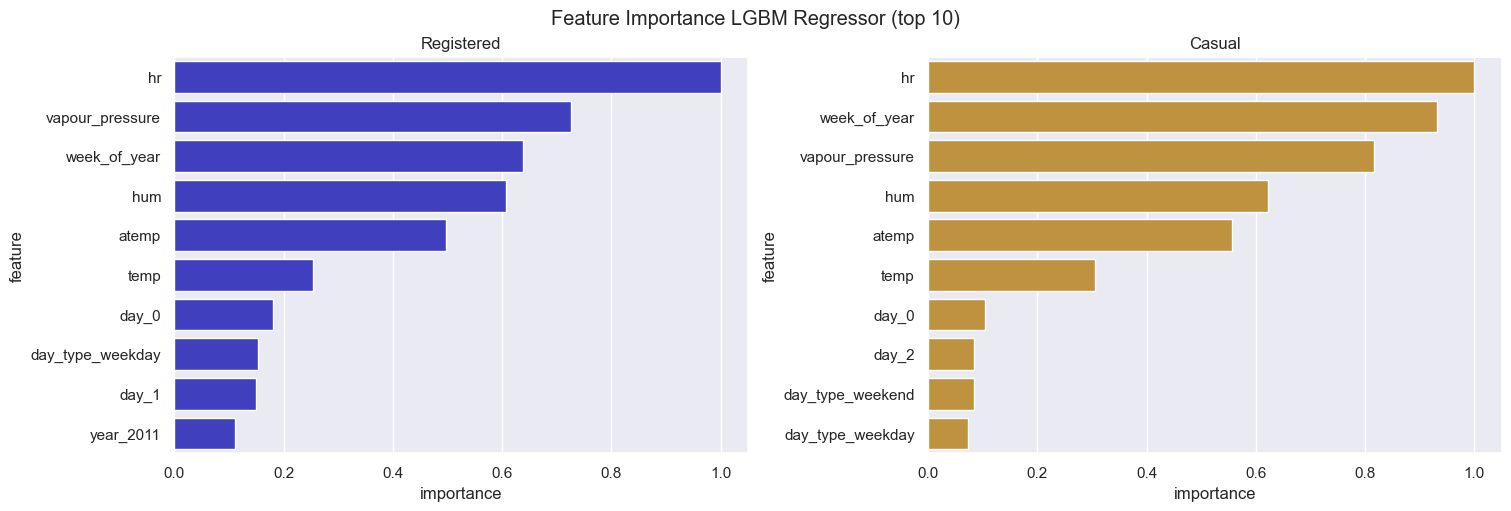

In [171]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), constrained_layout=True)
fig.suptitle('Feature Importance LGBM Regressor (top 10)')
axes[0].set_title("Registered")
sns.barplot(ax =axes[0] , data=feature_imp_reg.head(10), x='importance', y='feature', color='blue', saturation=0.5)
axes[1].set_title("Casual")
sns.barplot(ax =axes[1] , data=feature_imp_cas.head(10), x='importance', y='feature', color='orange', saturation=0.5)

<AxesSubplot: title={'center': 'Casual'}, xlabel='importance', ylabel='feature'>

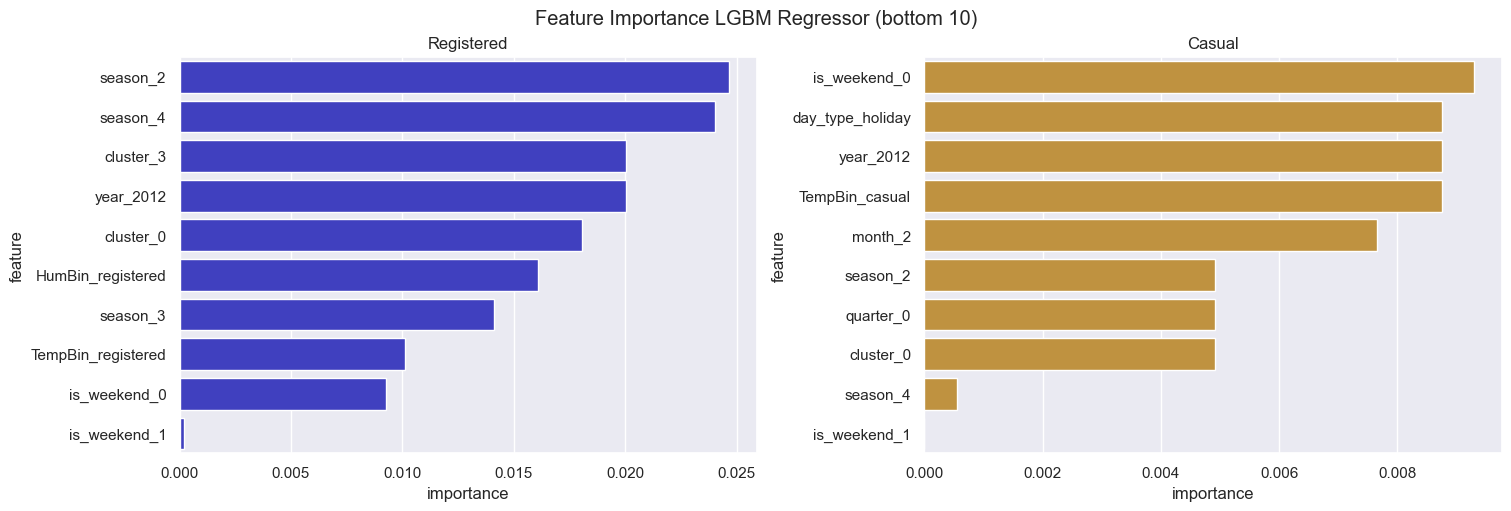

In [172]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), constrained_layout=True)
fig.suptitle('Feature Importance LGBM Regressor (bottom 10)')
axes[0].set_title("Registered")
sns.barplot(ax =axes[0] , data=feature_imp_reg.tail(10), x='importance', y='feature', color='blue', saturation=0.5)
axes[1].set_title("Casual")
sns.barplot(ax =axes[1] , data=feature_imp_cas.tail(10), x='importance', y='feature', color='orange', saturation=0.5)

Dari grafik di atas dapat dilihat bahwa kolom `is_weekend` memiliki nilai importance yang kecil, sehingga kita akan coba drop kolom ini, lalu kita fit model lgbm kembali. Kita akan cek apakah ada perubahan skor.

In [173]:
#Data Numerik
numeric_features_reg = ['hum', 'atemp', 'temp', 'hr', 'vapour_pressure', 'week_of_year']

numeric_features_cas = ['hum', 'atemp', 'temp', 'hr', 'vapour_pressure', 'week_of_year']

#Data Kategori
# Mengubah fitur kategorikal menjadi numerikal dan standard scaler untuk fitur numerical
#Kolom is_weekend di drop
transformer_reg_new = ColumnTransformer([
    ('scaler', StandardScaler(), numeric_features_reg),
    ('one hot', OneHotEncoder(sparse=False), ['year', 'day_type', 'season', 'cluster', 'weathersit']),
    ('binary', ce.BinaryEncoder(return_df=True), ['day', 'month', 'quarter', 'HourBin_registered','TempBin_registered', 'HumBin_registered'])
], remainder='passthrough')

transformer_cas_new = ColumnTransformer([
    ('scaler',  StandardScaler(), numeric_features_cas),
    ('one hot', OneHotEncoder(), ['year', 'day_type', 'season', 'cluster', 'weathersit']),
    ('binary', ce.BinaryEncoder(), ['day', 'month', 'quarter','HourBin_casual','TempBin_casual', 'HumBin_casual'])
], remainder='passthrough')

In [174]:
def model_testing_new (model, train_X, train_y, test_X, test_y, type) :
    score_rmse = []
    score_mae = []
    score_mape = []
    score_rmsle = []

    list_of_pred = []

    # Prediksi pada test set
    if type=='registered' : 
            TRANSFORMER = transformer_reg_new
    elif type=='casual' :
            TRANSFORMER = transformer_cas_new

    estimator = Pipeline([
            ('preprocessing', TRANSFORMER),
            ('model', model)
            ])

    for i in range(5):
        estimator.fit(train_X, train_y)
    y_pred = estimator.predict(test_X)
    score_rmse.append(np.sqrt(mean_squared_error(test_y, y_pred)))
    score_mae.append(mean_absolute_error(test_y, y_pred))
    score_mape.append(mean_absolute_percentage_error(test_y + 1, y_pred))
    score_rmsle.append(mean_squared_log_error(test_y, y_pred, squared=False))
    list_of_pred.append(y_pred)

    score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'sMAPE' : score_mape, 'RMSLE' : score_rmsle}, index=['LGBM'])
    
    return list_of_pred, score_before_tuning, estimator

In [175]:
#Drop kolom is_weekend
X_train_reg_new = X_train_reg.drop(['is_weekend'], axis=1)
X_test_reg_new = X_test_reg.drop(['is_weekend'], axis=1)

#Drop kolom is_weekend
X_train_cas_new = X_train_cas.drop(['is_weekend'], axis=1)
X_test_cas_new = X_test_cas.drop(['is_weekend'], axis=1)


In [176]:
#Score baru  untuk registered users setelah kolom is_weekend di drop
print("registered users new score")
new_y_pred_reg, new_score_reg, new_estimator_reg = model_testing_new(lgbm_tuning_reg['model'], X_train_reg_new, y_train_reg, X_test_reg_new, y_test_reg, 'registered')
display(new_score_reg)

#Score baru  untuk casual users setelah kolom is_weekend di drop
print("casual users new score")
new_y_pred_cas, new_score_cas, new_estimator_cas = model_testing_new(lgbm_tuning_cas['model'], X_train_cas_new, y_train_cas, X_test_cas_new, y_test_cas, 'casual')
display(new_score_cas)

registered users new score
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0


,RMSE,MAE,sMAPE,RMSLE
LGBM,34.268572,20.682882,0.177026,0.247637


casual users new score
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] lambda_l2 is set=3, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3


,RMSE,MAE,sMAPE,RMSLE
LGBM,14.315008,8.53943,0.30695,0.388955


In [177]:
print("Hasil testing LGBM untuk total users (registered + casual) sebelum kolom is_weekend di drop")
display(total_users_predict_score(models_reg, y_pred_reg_after_tuning, y_pred_cas_after_tuning, y_test).iloc[[2],:])


print("Hasil testing LGBM untuk total users (registered + casual) setelah kolom is_weekend di drop")
display(total_users_predict_score(models, new_y_pred_reg, new_y_pred_cas, y_test).iloc[[2],:])

Hasil testing LGBM untuk total users (registered + casual) sebelum kolom is_weekend di drop


,RMSE,MAE,sMAPE,RMSLE
LGBM,40.697631,25.220921,0.160817,0.235598


Hasil testing LGBM untuk total users (registered + casual) setelah kolom is_weekend di drop


,RMSE,MAE,sMAPE,RMSLE
LGBM,39.869373,24.754345,0.160914,0.236743


Dari dua tabel di atas dapat kita lihat, dengan menghapus fitur is_weekend didapatkan nilai error yang lebih rendah walaupun hanya sedikit.

Selanjutnya mari kita lihat sebaran nilai prediksi vs nilai aktual dari users count total

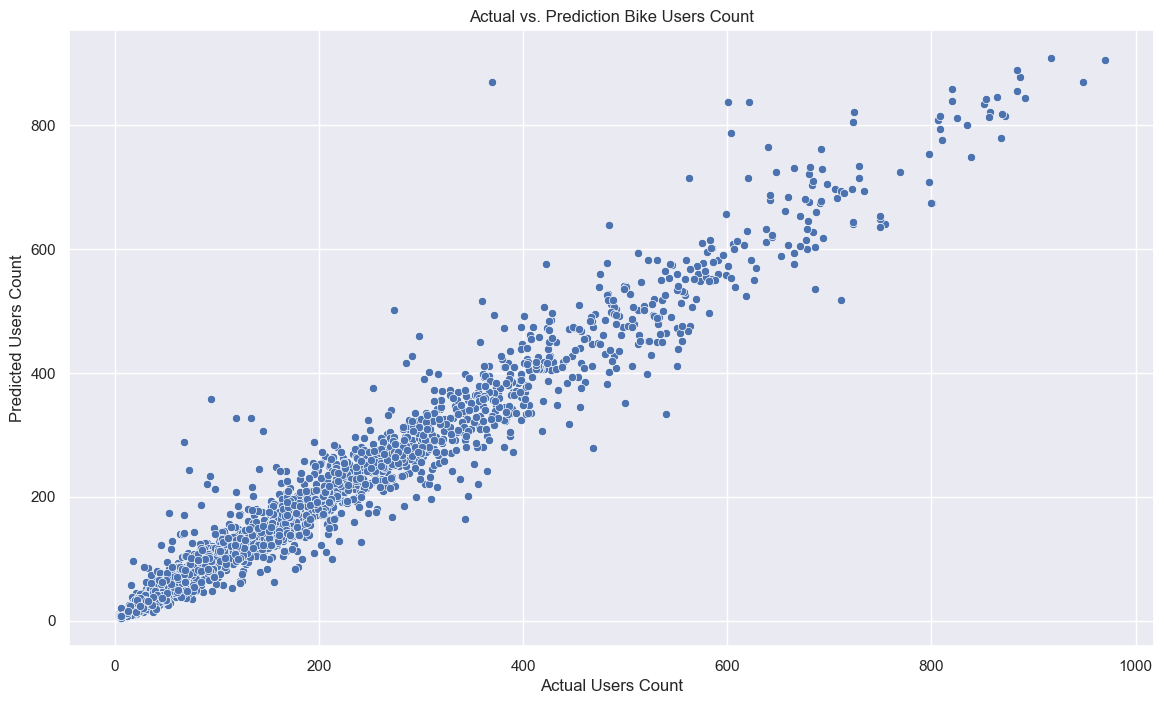

In [178]:
new_y_pred_total = new_y_pred_cas[0] + new_y_pred_reg[0]
new_y_pred_total = [int(x) for x in new_y_pred_total]

plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test['cnt'], y=new_y_pred_total).set(title='Actual vs. Prediction Bike Users Count', 
                                               xlabel='Actual Users Count', 
                                               ylabel='Predicted Users Count')

Adanya nilai-nilai error yang besar membuat perbedaan yang cukup signifikan antara nilai RMSE dan MAE. Hal ini dapat tergambarkan pula pada plot di atas, di mana terdapat harga aktual yang rendah tapi diprediksi jauh lebih tinggi (overestimation), dan juga sebaliknya (underestimation). Akan tetapi, nilai sMAPE yang didapat, yaitu sekitar 16% menjadikan model ini dapat dikategorikan ke dalam 'reasonable forecasting' (Lewis, 1982). (catatan disini saya asumsikan MAPE dan sMAPE memiliki asumsi yang sama)

*Source: Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting*

**Error Analysis**

Selanjutnya saya akan melakukan error analysis, untuk melihat data-data seperti apa saja yang membuat model ini memiliki nilai error yang tinggi.

In [179]:
y_test['cnt_predict'] = new_y_pred_total
y_test.head()

,registered,casual,cnt,cnt_predict
8123,59,3,62,93
7750,97,28,125,118
10504,291,15,306,311
4706,178,31,209,218
5445,31,2,33,38


Disini saya akan mengecek prediksi mana saja yang memiliki nilai error yang tinggi. Kita dapat mengelompokkan error tersebut ke dalam grup overestimation dan underestimation, lalu memilih 5% error paling ekstrim saja untuk tiap grup. Nantinya pengelompokkan akan menjadi 3 grup, yaitu overestimation (5%), underestimation (5%), dan grup mayoritas yang error-nya mendekati nilai mean (90%). Setelahnya kita bisa mengecek hubungan antara error tersebut dengan tiap variabel independen. Pada akhirnya kita dapat mengetahui sebenarnya variabel mana saja dan aspek apa yang menyebabkan model menghasilkan error yang tinggi, sehingga kita bisa melakukan training ulang dengan penerapan feature engineering lainnya.

In [180]:
cnt_result = y_test.copy()[['cnt', 'cnt_predict']]
cnt_result['cnt_error'] = cnt_result['cnt_predict'] - cnt_result['cnt']

underestimated = cnt_result['cnt_error'].sort_values().iloc[0:int(0.05*len(y_test))].index
overestimated= cnt_result['cnt_error'].sort_values().iloc[-int(0.05*len(y_test)):].index

cnt_result.loc[overestimated, 'error_group'] = 'overestimated'
cnt_result.loc[underestimated, 'error_group'] = 'underestimated'
cnt_result.fillna('majority', inplace=True)

fig = px.scatter(x=cnt_result['cnt_predict'], y=cnt_result['cnt'], color=cnt_result['error_group'], width=800)
fig.update_xaxes(title='Predicted value')
fig.update_yaxes(title='Actual value')

i) kolom `hum` (humidity)

In [181]:
cnt_result['hum'] = X_test['hum']
px.histogram(cnt_result['hum'], color=cnt_result['error_group'], opacity=0.6, barmode='group', title="Humidity feature")

Jika kita lihat model ini cenderung memprediksi nilai jumlah pengguna jauh lebih rendah (underestimated) dari nilai aktualnya saat nilai humidity nya berada pada range 0.82-0.83.

ii) kolom `hr`

In [182]:
cnt_result['hr'] = X_test['hr']
px.histogram(cnt_result['hr'], color=cnt_result['error_group'], opacity=0.6, barmode='group', title="Hour of Day feature")

- Jika kita lihat model ini cenderung memprediksi nilai jumlah pengguna jauh lebih tinggi (overestimated) dari nilai aktualnya saat nilai hour (hr) berada pada nilai 15 dan 18. Yang dimana dari hasil EDA jam ini merupakan jam yang cukup banyak pengguna nya. Untuk tahapan selanjutnya yang dapat dilakukan dengan memodifikasi fitur ini pada tahapan feature engineering dengan harapan bisa mengatasi limitasi model kita pada fitur hour.

iii) kolom `season` dan kolom `weathersit`

In [183]:
cnt_result[['season', 'weathersit']] = X_test[['season', 'weathersit']].astype(str)
px.histogram(cnt_result['season'], color=cnt_result['error_group'], opacity=0.6, barmode='group', title="Season feature")

In [184]:
px.histogram(cnt_result['weathersit'], color=cnt_result['error_group'], opacity=0.6, barmode='group', title="weathersit feature")

Dari hasil di atas, pada saat season 1 dan weathersit 2, model ini cenderung menghasilkan overestimated value dan underestimated value yang tinggi.

### **Conclusion**

Dari hasil pemodelan di atas, ada beberapa kesimpulan yang bisa kita ambil :

1. Model terbaik yang didapatkan yaitu LightGBM atau LGBM yang dimana setelah dituning memiliki nilai error yang paling rendah dari model lainnya. Ada empat metrik yang digunakan model yaitu RMSE, MAE, sMAPE dan RMSLE. Jika ditinjau dari nilai sMAPE yang dihasilkan oleh model setelah dilakukan hyperparameter tuning, yaitu ~16%, kita dapat menyimpulkan bahwa bila nanti model yang kita buat ini digunakan untuk memperkirakan jumlah pengguna sepeda di Washington D.C oleh Capital Bikeshare pada rentang nilai seperti yang dilatih terhadap model (antara 0-970 orang), maka perkiraan jumlah rata-rata akan meleset kurang lebih sebesar 16% dari jumlah users seharusnya. Tetapi tidak menutup kemungkinan juga prediksi nya meleset lebih jauh. Selain itu model ini juga memiliki limitasi ketika memprediksi jumlah pengguna yang mendekati 0 (dan memang dari awal saat melakukan pemodelan jumlah registered users yang bernilai 0, tidak disertakan atau di drop). Sedangkan jika ditinjau dari RMSLE, nilai error nya cukup rendah, yang dimana artinya relative error nya cukup rendah baik pada rentang jumlah user yang besar atau kecil. Dan juga bisa dibilang nilai prediksi yang lebih rendah dari nilai aktual nya (underestimation) dapat dihandel dengan cukup baik oleh model ini karena RMSLE sensitif dengan nilai prediksi yang underestimated, karena dari segi model bisnis penyewaan seperti penyewaan sepeda ini jika jumlah users yang kita prediksi ternyata jauh lebih sedikit dari nilai aktualnya, akan mengurangi profit yang signifikan, jadi kasus underestimation lebih diperhatikan.

2. Berdasarkan pemodelan yang sudah dilakukan, fitur 'hr', 'hum', 'vapour_pressure' dan 'week_of_year' menjadi fitur yang paling berpengaruh terhadap 'registered' dan 'casual' yang artinya paling berpengaruh juga terhadap target 'cnt'.

3. Dari error analysis yang dilakukan, terdapa kondisi pada beberapa fitur yang membuat model ini memiliki nilai prediksi dengan error yang tinggi. Seperti contoh model cenderung memprediksi nilai jumlah pengguna jauh lebih rendah (underestimated) dari nilai aktualnya saat nilai humidity nya berada pada range 0.82-0.83. Dari segi fitu 'hr', model ini cenderung memprediksi nilai jumlah pengguna jauh lebih tinggi (overestimated) dari nilai aktualnya saat nilai hour (hr) berada pada nilai 15 dan 18. Dan juga model cenderung menghasilkan overestimated value dan underestimated value yang tinggi di nilai season 1 (winter) dan nilai weathersit 2 (Mist + Cloudy, Mist + Broken clouds)


### **Recommendations**

Lalu, hal-hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:

1. Saat mengecek prediksi mana saja yang memiliki nilai error yang tinggi, disarankan setelah itu kita bisa mengecek hubungan antara error tersebut dengan tiap variabel independen dengan detail per fitur (bisa juga dilakukan terhadap fitur baru yang dibuat). Pada akhirnya kita dapat mengetahui sebenarnya variabel mana saja dan aspek apa yang menyebabkan model menghasilkan error yang tinggi dengan lebih mendalam, sehingga kita bisa melakukan training ulang dengan penerapan feature engineering lainnya.
<br><br>   
2. Jika memungkinkan, penambahan fitur yang lebih korelatif dengan target ('cnt'), seperti data lokasi longitude, latitude, keadaan tanah, jumlah taman dll yang berhubungan dengan data lokasi/tempat. Selain itu, adanya penambahan data terkini dari Capital Bikeshare tentu akan dapat mengimprovisasi kapasitas prediksi dari model.
<br><br>   
3. Jika ada penambahan banyak data, dapat dicoba dengan menggunakan model yang lebih kompleks, seperti recursive neural networks (RNN). Namun, kalau jumlah data dan fiturnya masih seperti dataset ini, kemungkinan besar tidak akan mengubah hasilnya secara signifikan.
<br><br>   
4. Model yang sudah dibangun ini bisa dimanfaatkan untuk pengembangan pembuatan model lainnya. Contohnya seperti pembuatan model untuk memprediksi update jumlah pengguna sepeda untuk setiap kios/outlet yang memiliki review berupa data teks. Pembuatan model dengan tujuan seperti ini dapat memanfaatkan data asli rilisan dari Capital Bikeshare yang mungkin memiliki kolom 'review' dari customer. Jika memang ada, kita dapat melakukan sentiment analysis untuk mendapatkan insight dari review customer tersebut. 

    Dalam prosesnya, tiap review dapat di-assign ke dalam -1 (untuk sentimen negatif), 1 (untuk sentimen positif) dan 0 (untuk netral). Nantinya, nilai review yang didapat untuk tiap kios/outlet yang sama akan dirata-ratakan, sehingga nantinya nilai akhir untuk tiap kios/outlet tersebut dapat kita gunakan sebagai fitur pada model. Pada akhirnya, akurasi prediksi dari model pun bisa lebih baik.

5. Memperluas kombinasi parameter untuk tuning pada model LGBM, karena model ini sangat sensitif terhadap overfitting yang artinya pemilihan parameter nya harus tepat, dengan harapan bisa membuat model menjadi lebih baik lagi.

#### **Save Model**

In [185]:
# best_estimator_reg = {'LGBM' : new_estimator_reg}
# best_estimator_cas = {'LGBM' : new_estimator_cas}

In [186]:
# # Save model
# import pickle

# #Model for Registered users
# estimator_registered = Pipeline([
#             ('preprocessing', best_estimator_reg['LGBM'].named_steps['preprocessing']),
#             ('model',best_estimator_reg['LGBM'].named_steps['model'])
#             ])
# estimator_registered.fit(X_train_reg_new, y_train_reg)
# pickle.dump(estimator_registered, open('Models/Model_Bike_Demand_registered.sav', 'wb'))


# #Model for Casual users
# estimator_casual = Pipeline([
#             ('preprocessing', best_estimator_cas['LGBM'].named_steps['preprocessing']),
#             ('model', best_estimator_cas['LGBM'].named_steps['model'])
#             ])
# estimator_casual.fit(X_train_cas_new, y_train_cas)
# pickle.dump(estimator_casual, open('Models/Model_Bike_Demand_casual.sav', 'wb'))

#### **Load Model and Testing**

import data tes, dan lakukan preprocess dengan memanggil fungsi `create_new_features` dari modul yang sudah saya buat (preprocessing.py) untuk penambahan fitur barunya.

In [187]:
# import pickle
# from preprocessing import create_new_features

# #import data test
# test_df = pd.read_csv('test.csv')
# #preprocess
# final_test_df = create_new_features(test_df)

# #sMAPE scoring
# def smape(actual, predict):
#         score = 1/len(actual) * np.sum(2 * np.abs(predict - actual) / (np.abs(actual) + np.abs(predict)))
#         return score

# #split target dan data independen (fitur)
# X_test_final = final_test_df.drop(['casual', 'cnt', 'registered'], axis=1)
# y_test_final = final_test_df[['registered', 'casual', 'cnt']]

# # Memisahkan data independen variabel dengan target (registered users)
# X_test_reg_final = X_test_final.drop(['TempBin_casual', 'HourBin_casual', 'HumBin_casual'], axis=1)
# y_test_reg_final = y_test_final['registered']

# # Memisahkan data independen variabel dengan target (casual users)
# X_test_cas_final = X_test_final.drop(['TempBin_registered', 'HourBin_registered', 'HumBin_registered'], axis=1)
# y_test_cas_final = y_test_final['casual']


Load model nya dari folder Models, lalu lakukan prediksi.

In [188]:
# # Load model Registered users
# filename_reg = 'Models/Model_Bike_Demand_registered.sav'
# loaded_model_reg = pickle.load(open(filename_reg, 'rb'))
# #predict registered users
# y_predict_reg = loaded_model_reg.predict(X_test_reg_final)


# # Load model Casual users
# filename_cas = 'Models/Model_Bike_Demand_casual.sav'
# loaded_model_cas= pickle.load(open(filename_cas, 'rb'))
# #predict casual users
# y_predict_cas = loaded_model_cas.predict(X_test_cas_final)


# #Total users prediction result
# y_predict_total = y_predict_reg + y_predict_cas
# y_predict_total = y_predict_total.astype(int)

Scoring dengan data test baru

In [ ]:
# # Score for Total User Counts
# print("Score for Total Bike Users Prediction")
# print("RMSE : ", np.sqrt(mean_squared_error(y_test_final['cnt'], y_predict_total)))
# print("MAE : ", mean_absolute_error(y_test_final['cnt'], y_predict_total))
# print("sMAPE : ", smape(y_test_final['cnt'], y_predict_total))
# print("RMSLE : ", mean_squared_log_error(y_test_final['cnt'], y_predict_total, squared=False))